### Importing The Libraries

In [1]:
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import seaborn as sns

plt.style.use(style="seaborn")
%matplotlib inline

In [3]:
data_tata_steel= pd.read_csv(r"C:\Users\omami\OneDrive\Desktop\ISI\Sem_2_ISI\Time series\Project\Data set\Quote-Equity-TATASTEEL-EQ-01-01-2022-to-28-02-2022.csv")

In [4]:
data_tata_steel.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,28-Feb-22,EQ,"1,134.00","1,225.00","1,129.20","1,145.35","1,217.90","1,220.75","1,196.83","1,534.50",681.25,17605446,"21,07,07,73,518.25",408543
1,25-Feb-22,EQ,"1,097.70","1,150.70","1,095.60","1,074.00","1,144.95","1,145.35","1,136.16","1,534.50",670.85,9212886,"10,46,73,47,648.45",226899
2,24-Feb-22,EQ,"1,094.00","1,119.95","1,067.10","1,139.00","1,079.00","1,074.00","1,095.75","1,534.50",670.85,12126867,"13,28,80,73,810.50",324643
3,23-Feb-22,EQ,"1,148.00","1,152.60","1,134.00","1,138.70","1,137.90","1,139.00","1,143.60","1,534.50",670.85,4960838,"5,67,32,17,190.30",129498
4,22-Feb-22,EQ,"1,158.00","1,166.65","1,119.25","1,181.85","1,134.00","1,138.70","1,141.03","1,534.50",670.85,9385857,"10,70,95,65,886.60",222627


In [5]:
data_tata_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           540 non-null    object 
 1   series         540 non-null    object 
 2   OPEN           540 non-null    object 
 3   HIGH           540 non-null    object 
 4   LOW            540 non-null    object 
 5   PREV. CLOSE    540 non-null    object 
 6   ltp            540 non-null    object 
 7   close          540 non-null    object 
 8   vwap           540 non-null    object 
 9   52W H          540 non-null    object 
 10  52W L          540 non-null    float64
 11  VOLUME         540 non-null    int64  
 12  VALUE          540 non-null    object 
 13  No of trades   540 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 59.2+ KB


In [6]:
data_tata_steel=data_tata_steel[["Date ","close "]]

In [7]:
list(data_tata_steel.columns)

['Date ', 'close ']

In [8]:
## for sake of simplicity in data there is one extraspace anfter each column name we will remname that.

In [9]:
data_tata_steel=data_tata_steel.rename(columns={"Date " :"Date","close ":"close"})

In [10]:
list(data_tata_steel.columns)

['Date', 'close']

In [11]:

## we will select rows which are important and contribute in analysis and drop others

In [12]:
data_tata_steel.tail(3)

,Date,close
537,03-Jan-20,483.7
538,02-Jan-20,484.85
539,01-Jan-20,467.75


In [13]:
## for time series analysis we will see trend date and close price

In [14]:
## converting Date in date time format
data_tata_steel['Date'] = pd.to_datetime(data_tata_steel['Date'])

In [15]:
## sorting the data by its date 
data_tata_steel=data_tata_steel.sort_values(by='Date')
## seting index as date
data_tata_steel=data_tata_steel.set_index('Date',drop=True)

In [16]:
data_tata_steel["close"]=data_tata_steel["close"].str.replace(",","")
data_tata_steel["close"]=pd.to_numeric(data_tata_steel["close"])

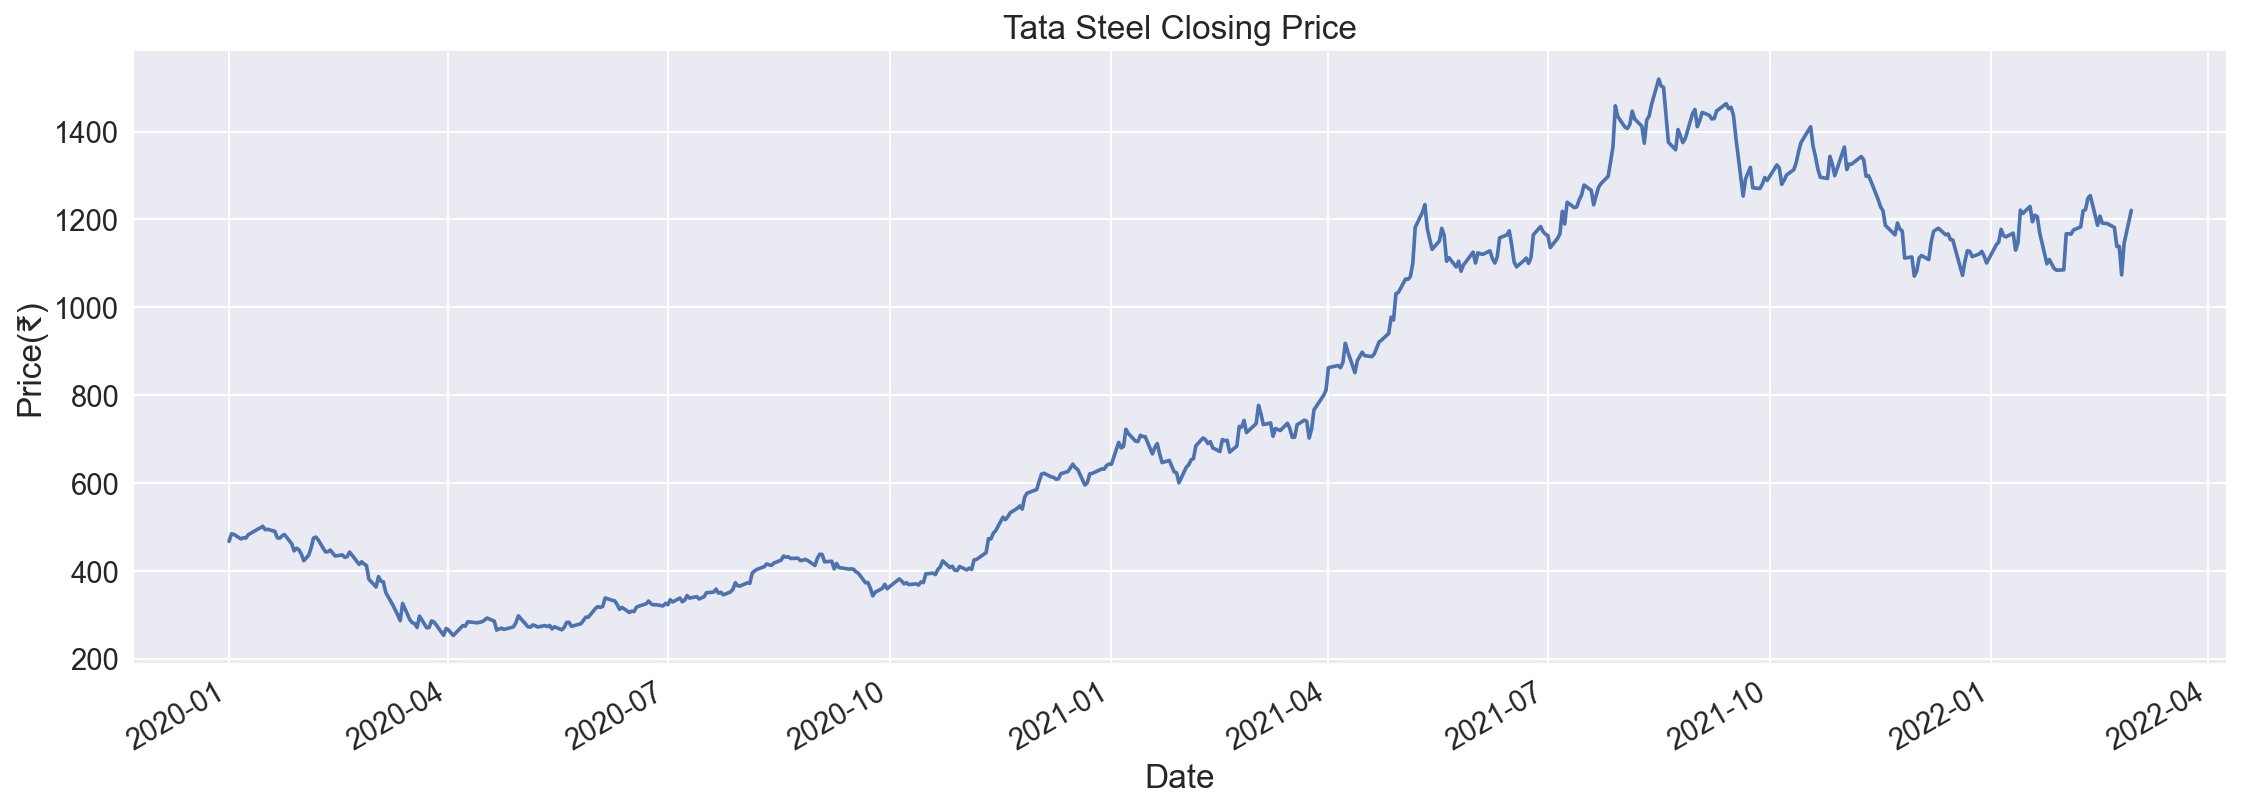

In [17]:
plt.figure(figsize=(18,6), dpi=150)
data_tata_steel["close"].plot(fontsize=14)
plt.title("Tata Steel Closing Price",fontsize=16)
plt.ylabel("Price(₹)",fontsize=16)
plt.xlabel("Date",fontsize=16)
plt.show()

In [18]:
df_18=data_tata_steel.close[:246]
df_19=data_tata_steel.close[246:491]
df_20=data_tata_steel.close[491:743]
df_21=data_tata_steel.close[743:991]
df_21.tail()

Series([], Name: close, dtype: float64)

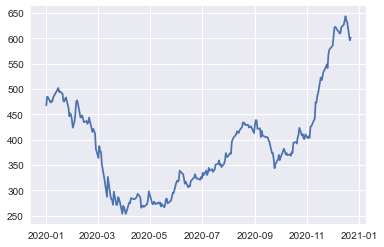

In [19]:
plt.plot(df_18)

<Figure size 432x288 with 0 Axes>

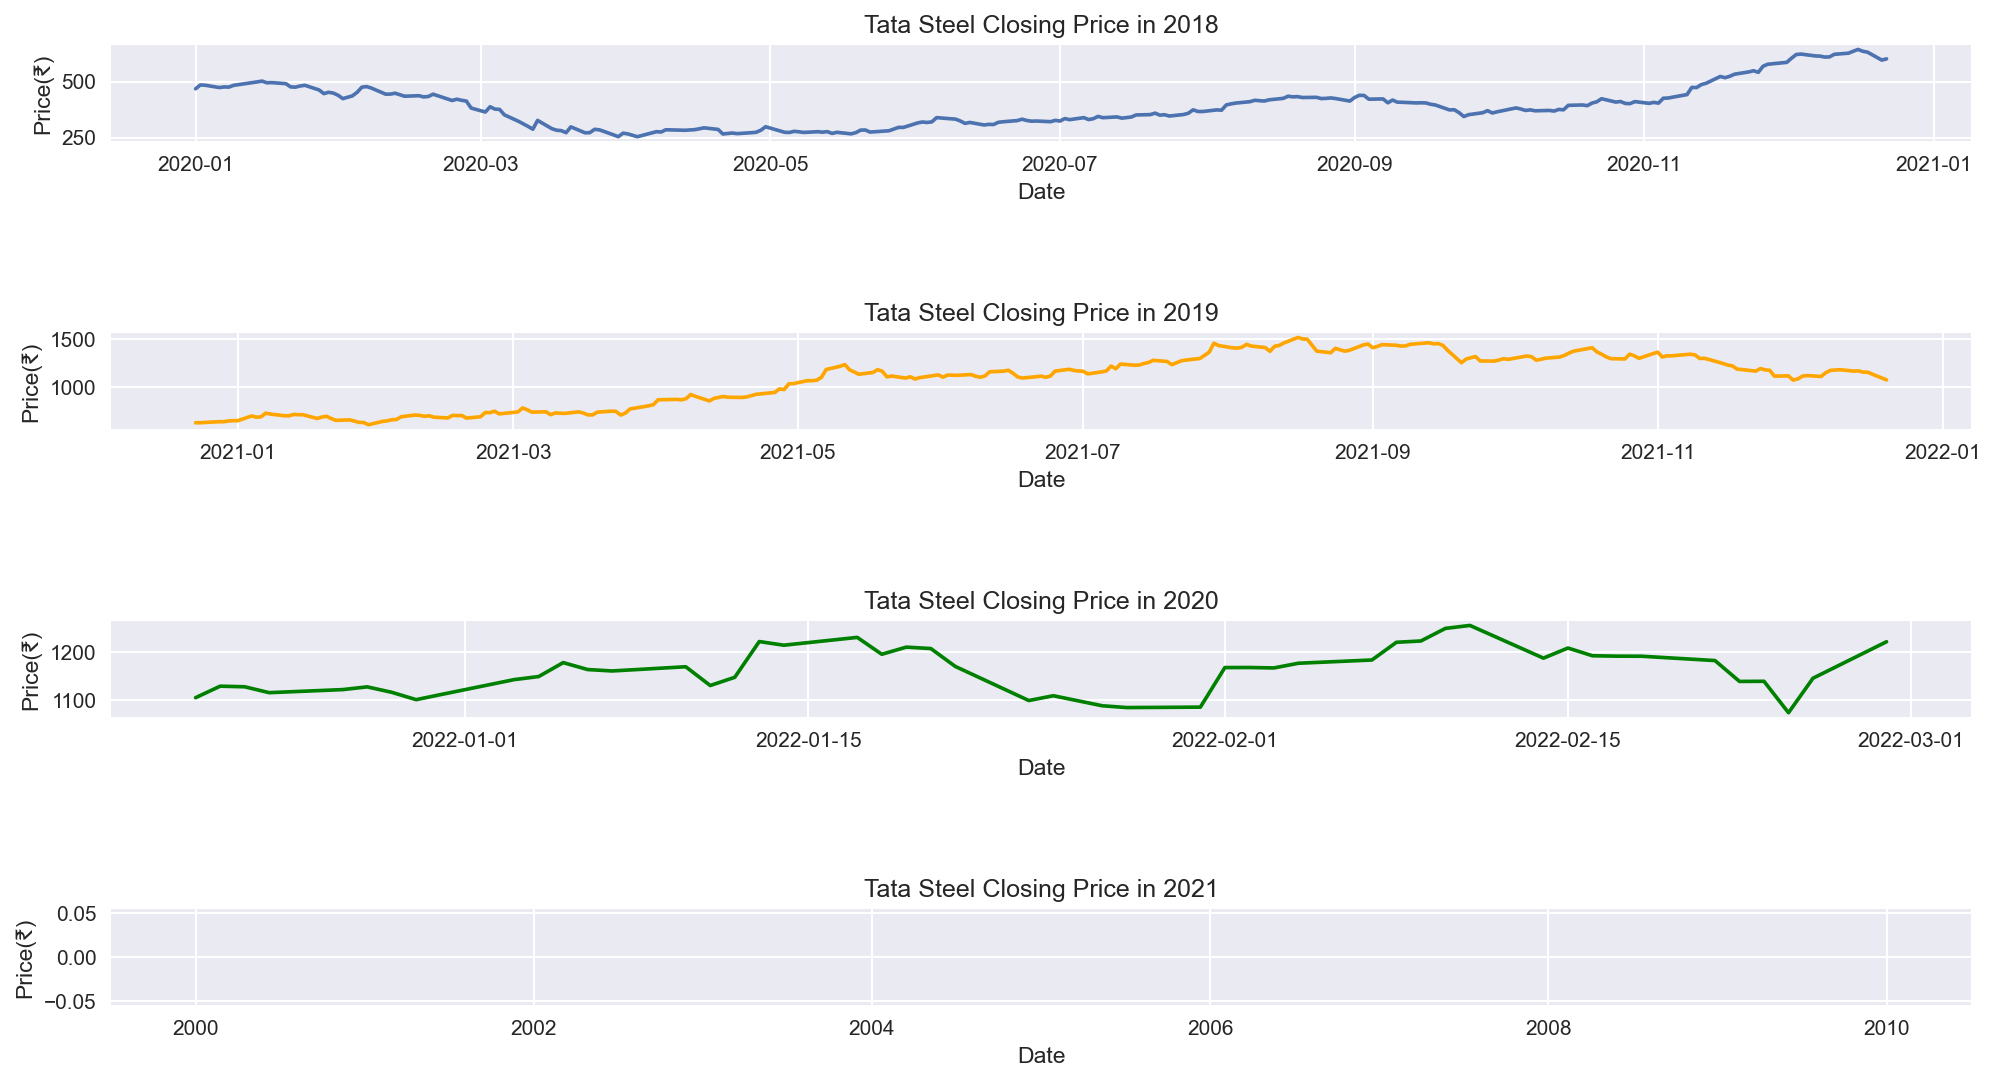

In [20]:
fig = plt.figure()
# fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=.9)
plt.figure(figsize=(16,8), dpi=150)

plt.subplot(4, 1, 1)
plt.plot(df_18)
plt.title("Tata Steel Closing Price in 2018")
plt.ylabel("Price(₹)")
plt.xlabel("Date")

#

plt.subplot(4, 1, 2)
plt.plot(df_19, color='orange')
plt.title("Tata Steel Closing Price in 2019")
plt.ylabel("Price(₹)")
plt.xlabel("Date")

#

plt.subplot(4, 1, 3)
plt.plot(df_20,color='green')
plt.title("Tata Steel Closing Price in 2020")
plt.ylabel("Price(₹)")
plt.xlabel("Date")

#

plt.subplot(4, 1, 4)
plt.plot(df_21,color="red")
plt.title("Tata Steel Closing Price in 2021")
plt.ylabel("Price(₹)")
plt.xlabel("Date")


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=2)
plt.show()

In [21]:
df_18.describe()

count    246.000000
mean     392.888415
std       93.918524
min      253.750000
25%      320.625000
50%      384.925000
75%      438.687500
max      643.400000
Name: close, dtype: float64

<AxesSubplot:>

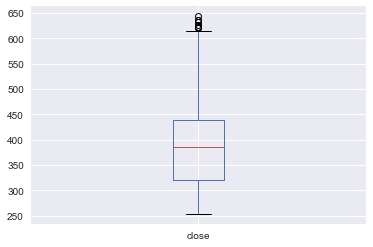

In [22]:
df_18.plot.box()

<Figure size 432x288 with 0 Axes>

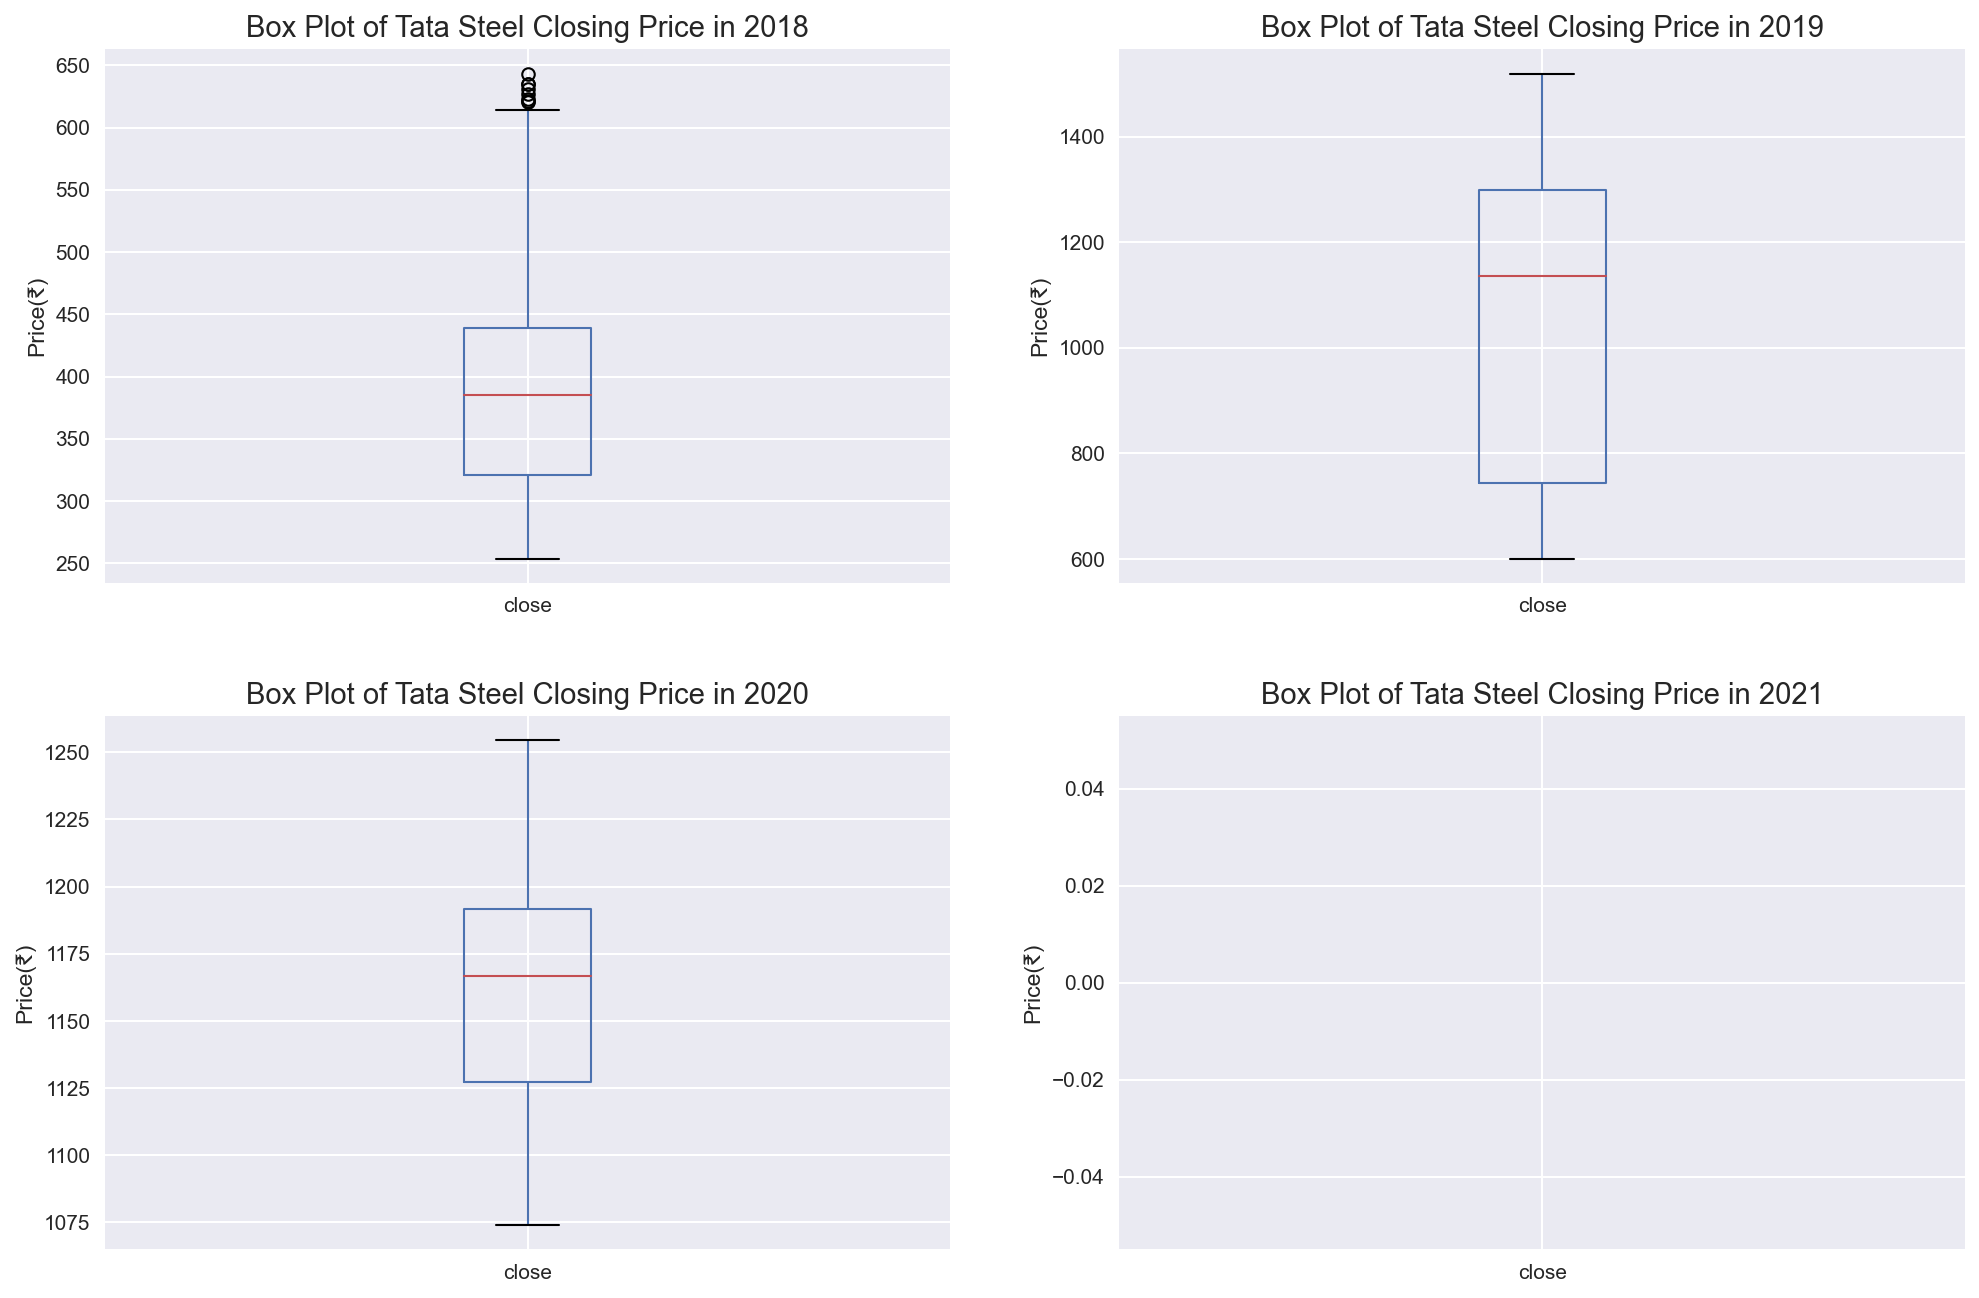

In [23]:
fig = plt.figure()
# fig.subplots_adjust(bottom=0.1, left=0.1, top = 0.9, right=.9)
plt.figure(figsize=(16,10), dpi=150)

plt.subplot(2, 2, 1)
df_18.plot.box()
plt.title("Box Plot of Tata Steel Closing Price in 2018",fontsize=14)
plt.ylabel("Price(₹)")

#

plt.subplot(2, 2, 2)
df_19.plot.box()
plt.title("Box Plot of Tata Steel Closing Price in 2019",fontsize=14)
plt.ylabel("Price(₹)")

#

plt.subplot(2, 2, 3)
df_20.plot.box()
plt.title("Box Plot of Tata Steel Closing Price in 2020",fontsize=14)
plt.ylabel("Price(₹)")

#

plt.subplot(2, 2,4)
df_21.plot.box()
plt.title("Box Plot of Tata Steel Closing Price in 2021",fontsize=14)
plt.ylabel("Price(₹)")



plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=.25)

plt.show()

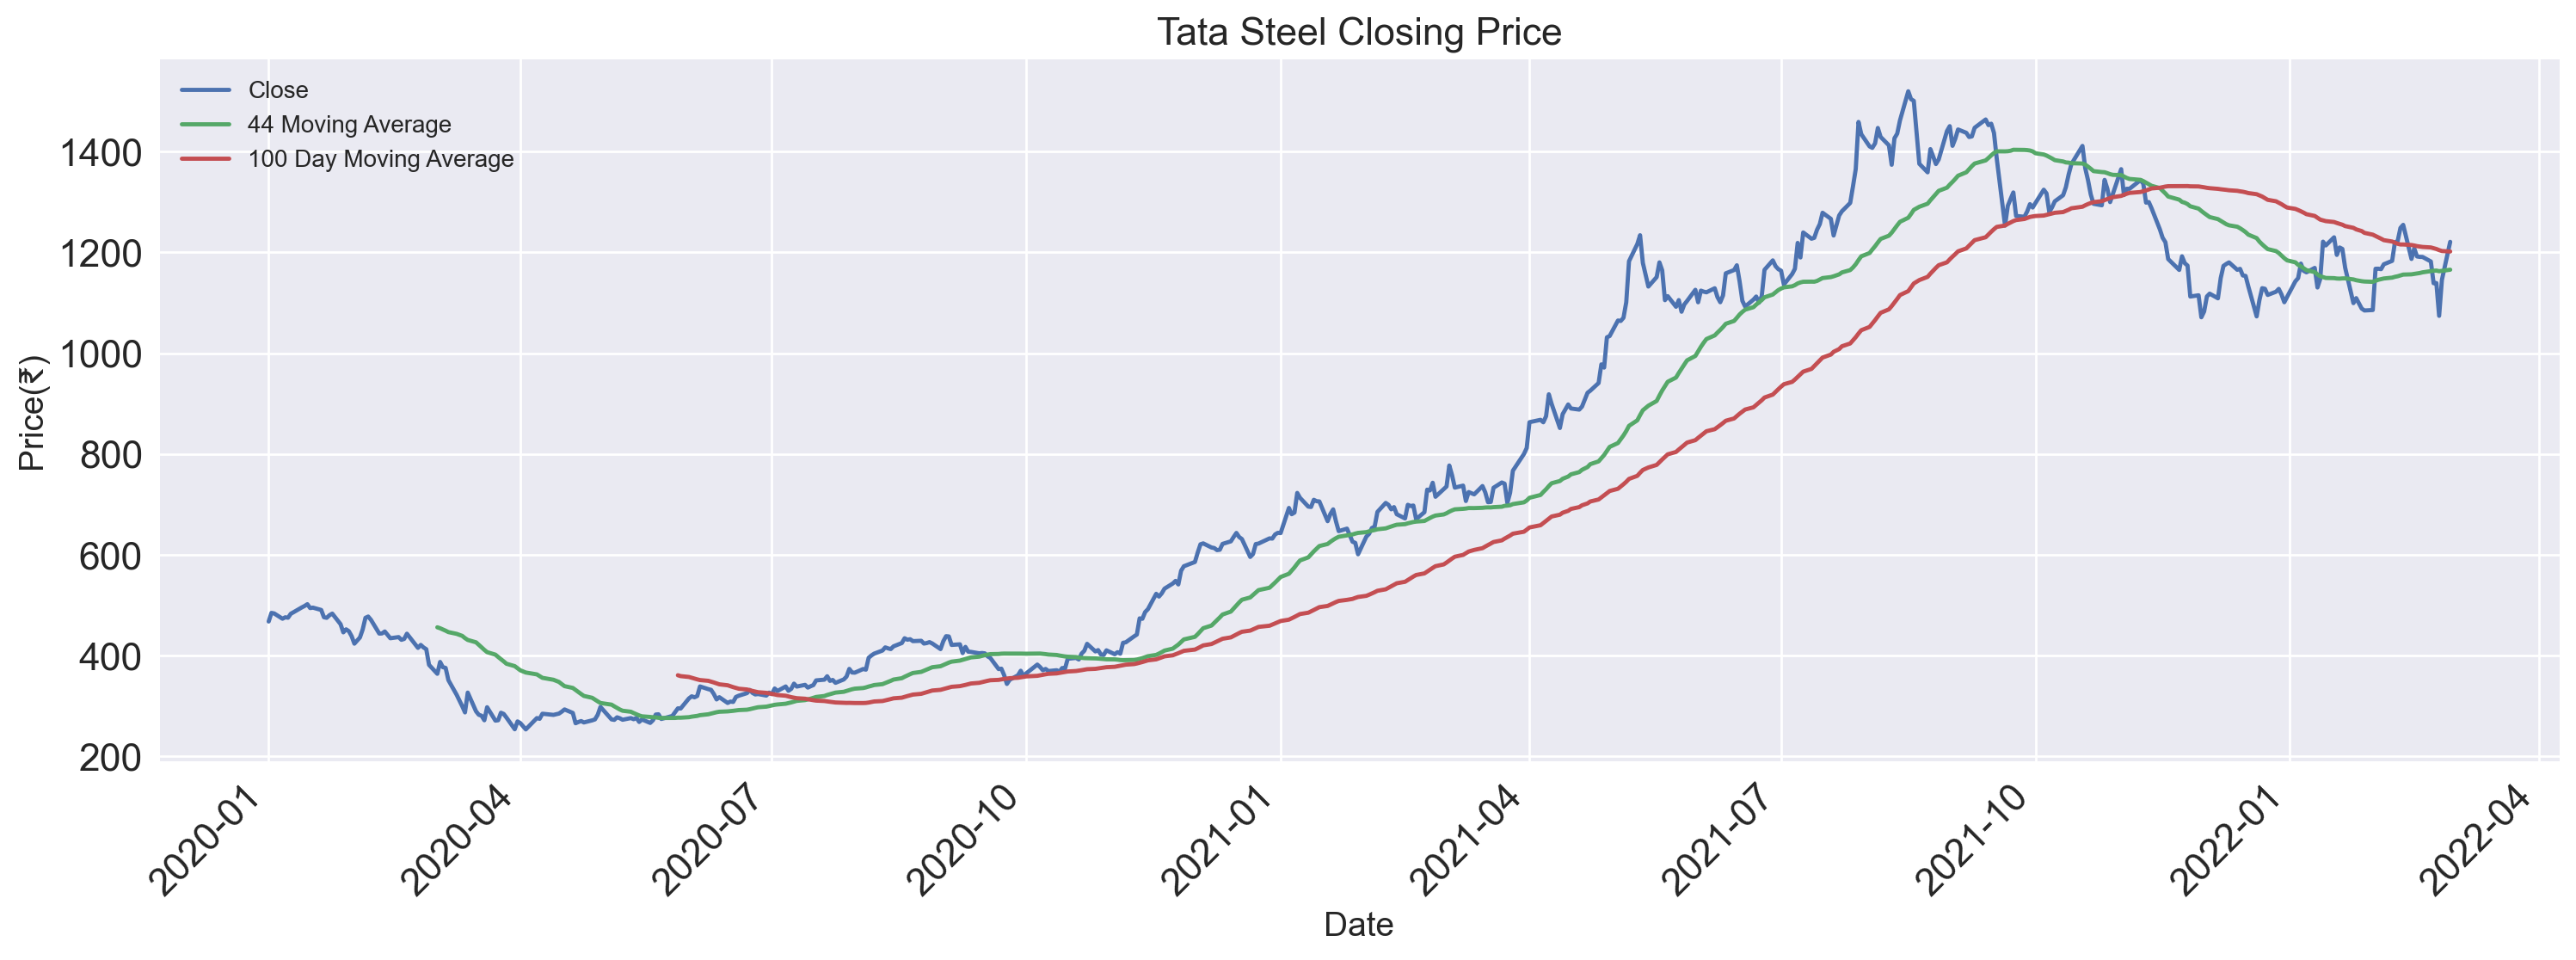

In [24]:
plt.figure(figsize=(18,6), dpi=200)
data_tata_steel["close"].plot(fontsize=16)
data_tata_steel["close"].rolling(window=44).mean().plot()
data_tata_steel["close"].rolling(window=100).mean().plot()
plt.legend(("Close","44 Moving Average","100 Day Moving Average"),loc = 'upper left')

plt.xticks(rotation=45)
plt.title("Tata Steel Closing Price",fontsize=16)
plt.ylabel("Price(₹)",fontsize=14)
plt.xlabel("Date",fontsize=14)
plt.show()

#### Data Frame in univeriante

In [25]:
df1=data_tata_steel["close"]

In [26]:
n=int(len(df1)*0.85)
df=df1[:n]
test=df1[n:]

In [27]:
df_18.describe()

count    246.000000
mean     392.888415
std       93.918524
min      253.750000
25%      320.625000
50%      384.925000
75%      438.687500
max      643.400000
Name: close, dtype: float64

In [28]:
df_19.describe()

count     245.000000
mean     1076.724694
std       271.345697
min       601.000000
25%       743.500000
50%      1136.000000
75%      1298.550000
max      1519.400000
Name: close, dtype: float64

In [29]:
df_20.describe()

count      49.000000
mean     1160.805102
std        46.303977
min      1074.000000
25%      1127.450000
50%      1166.600000
75%      1191.800000
max      1254.450000
Name: close, dtype: float64

In [30]:
df_21.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: close, dtype: float64

### Checking stationary by Agumented Dickey -fuller test
#### Null Hypothesis: series is non stationary and Alternativve : it is stationary

In [31]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df.dropna())
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")


ADF Statistic : 0.32925706949950106
p-value : 0.9786476770506771


###  p value is higher than significance level we are fail to reject null hypothesis
### which implies data is non- stationary




###  Non Stationary 

In [32]:
from statsmodels.graphics.tsaplots import plot_acf

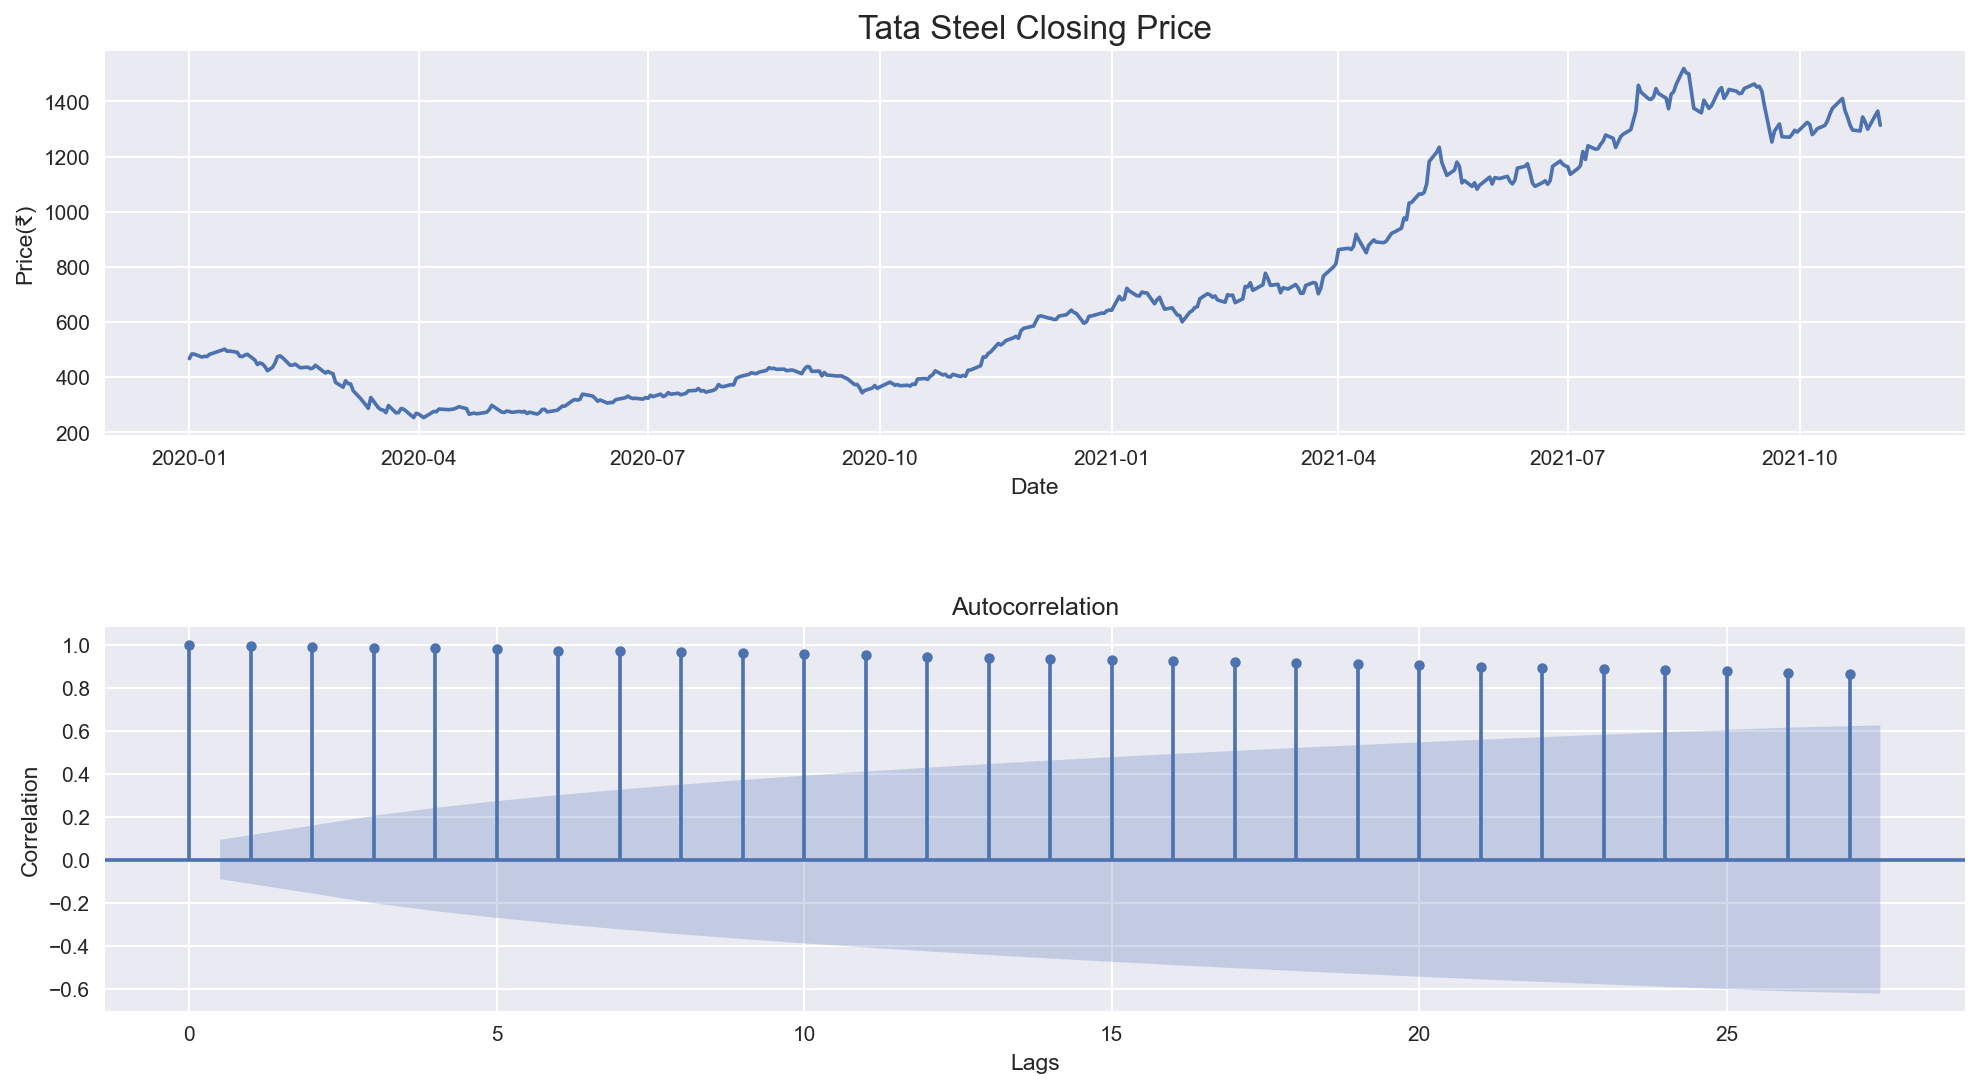

In [33]:
fig, (ax1,ax2)= plt.subplots(2, figsize=(16,8),dpi=150)
ax1.plot(df)
ax1.set_title(("Tata Steel Closing Price"),fontsize=16)
plt.title("Tata Steel Closing Price")
plt.ylabel("Correlation")
plt.xlabel("Lags")
plot_acf(df,ax=ax2,)
ax1.set_ylabel('Price(₹)')
ax1.set_xlabel('Date')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=.5);

####  Takining first differencing 

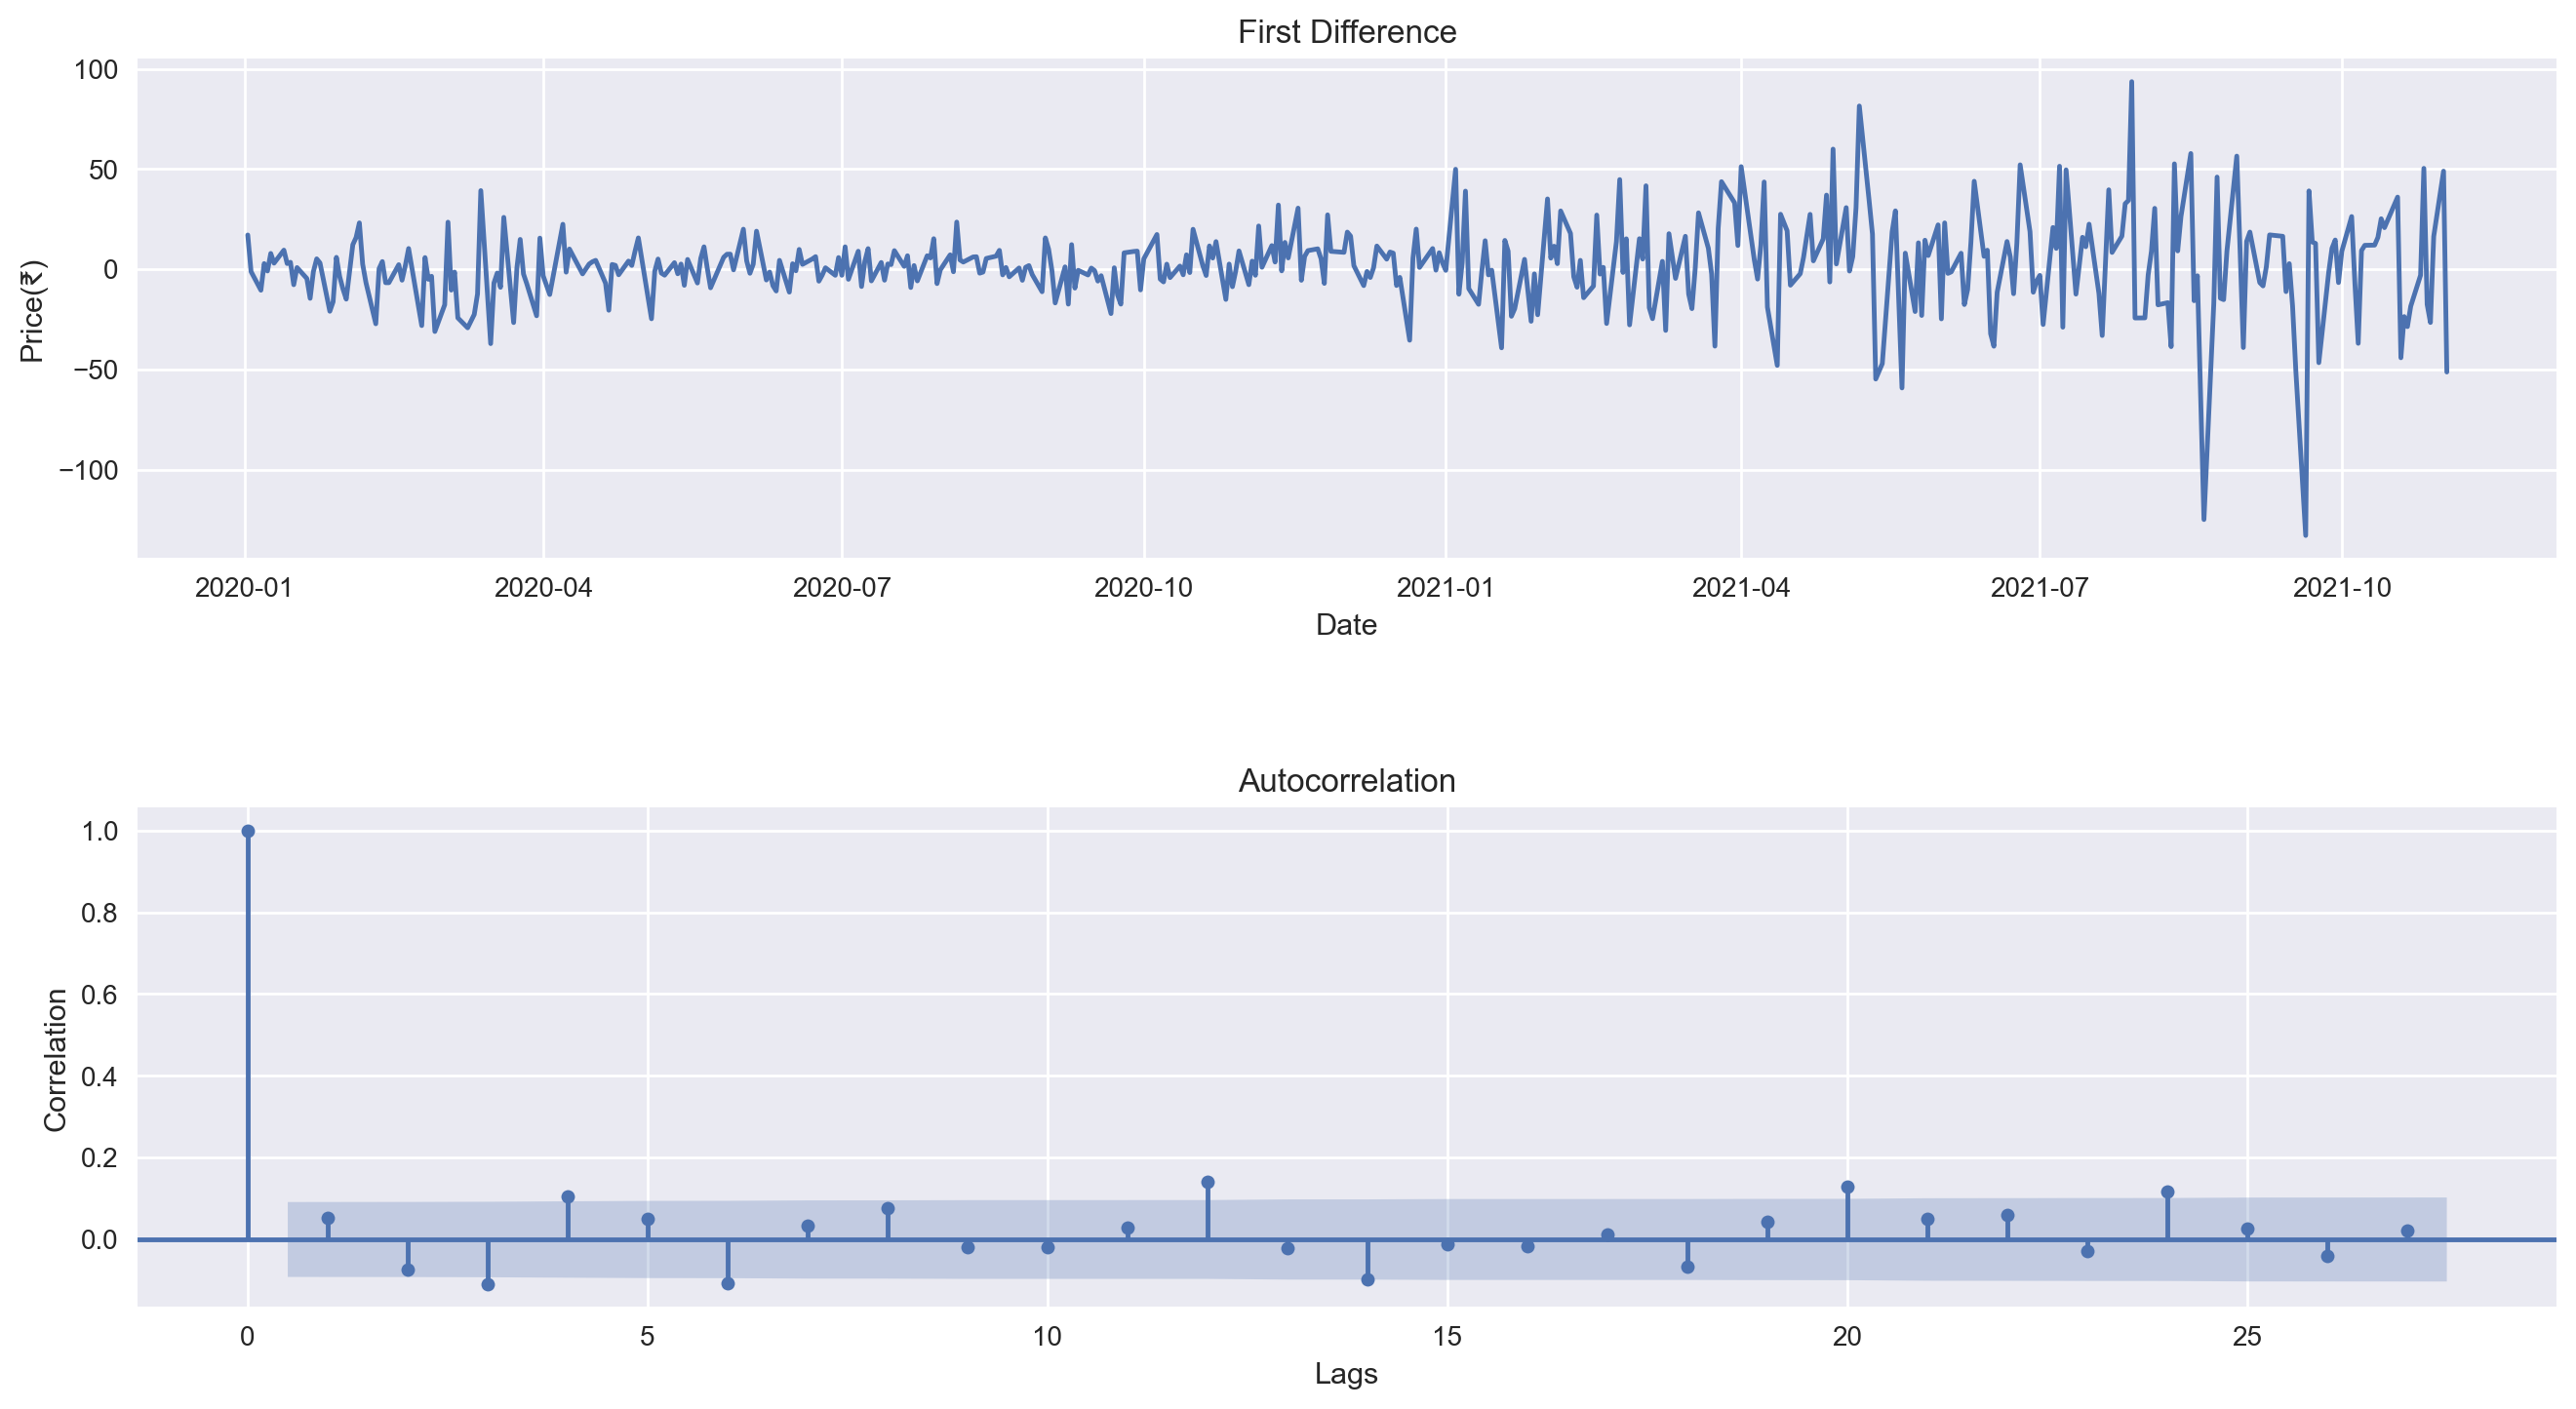

In [34]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(2, figsize=(16,8),dpi=200)

ax1.plot(diff)
ax1.set_title(("First Difference"))

## add ;

plot_acf(diff,ax=ax2)
ax1.set_ylabel('Price(₹)')
plt.xlabel("Lags")
plt.ylabel("Correlation")
ax1.set_xlabel('Date')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=.5);

In [35]:
diff.describe()

count    458.000000
mean       1.846943
std       21.238747
min     -132.800000
25%       -6.925000
50%        1.875000
75%       11.025000
max       93.600000
Name: close, dtype: float64

####  After first diffrence we can see there is no trend and it is starinary

In [36]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(diff.dropna())
print(f"ADF Statistic : {result[0]}")
print(f"p-value : {result[1]}")

ADF Statistic : -7.856245680105732
p-value : 5.4330923957904076e-12


### stoping criteria likhna h
####  Autocorrelation goes far negative we choose I as 1

###  we can use the pmdarima package to get the number of differencing 

In [37]:
from pmdarima.arima.utils import ndiffs

In [38]:
ndiffs(df,test="adf")

1

In [39]:

from statsmodels.graphics.tsaplots import plot_pacf

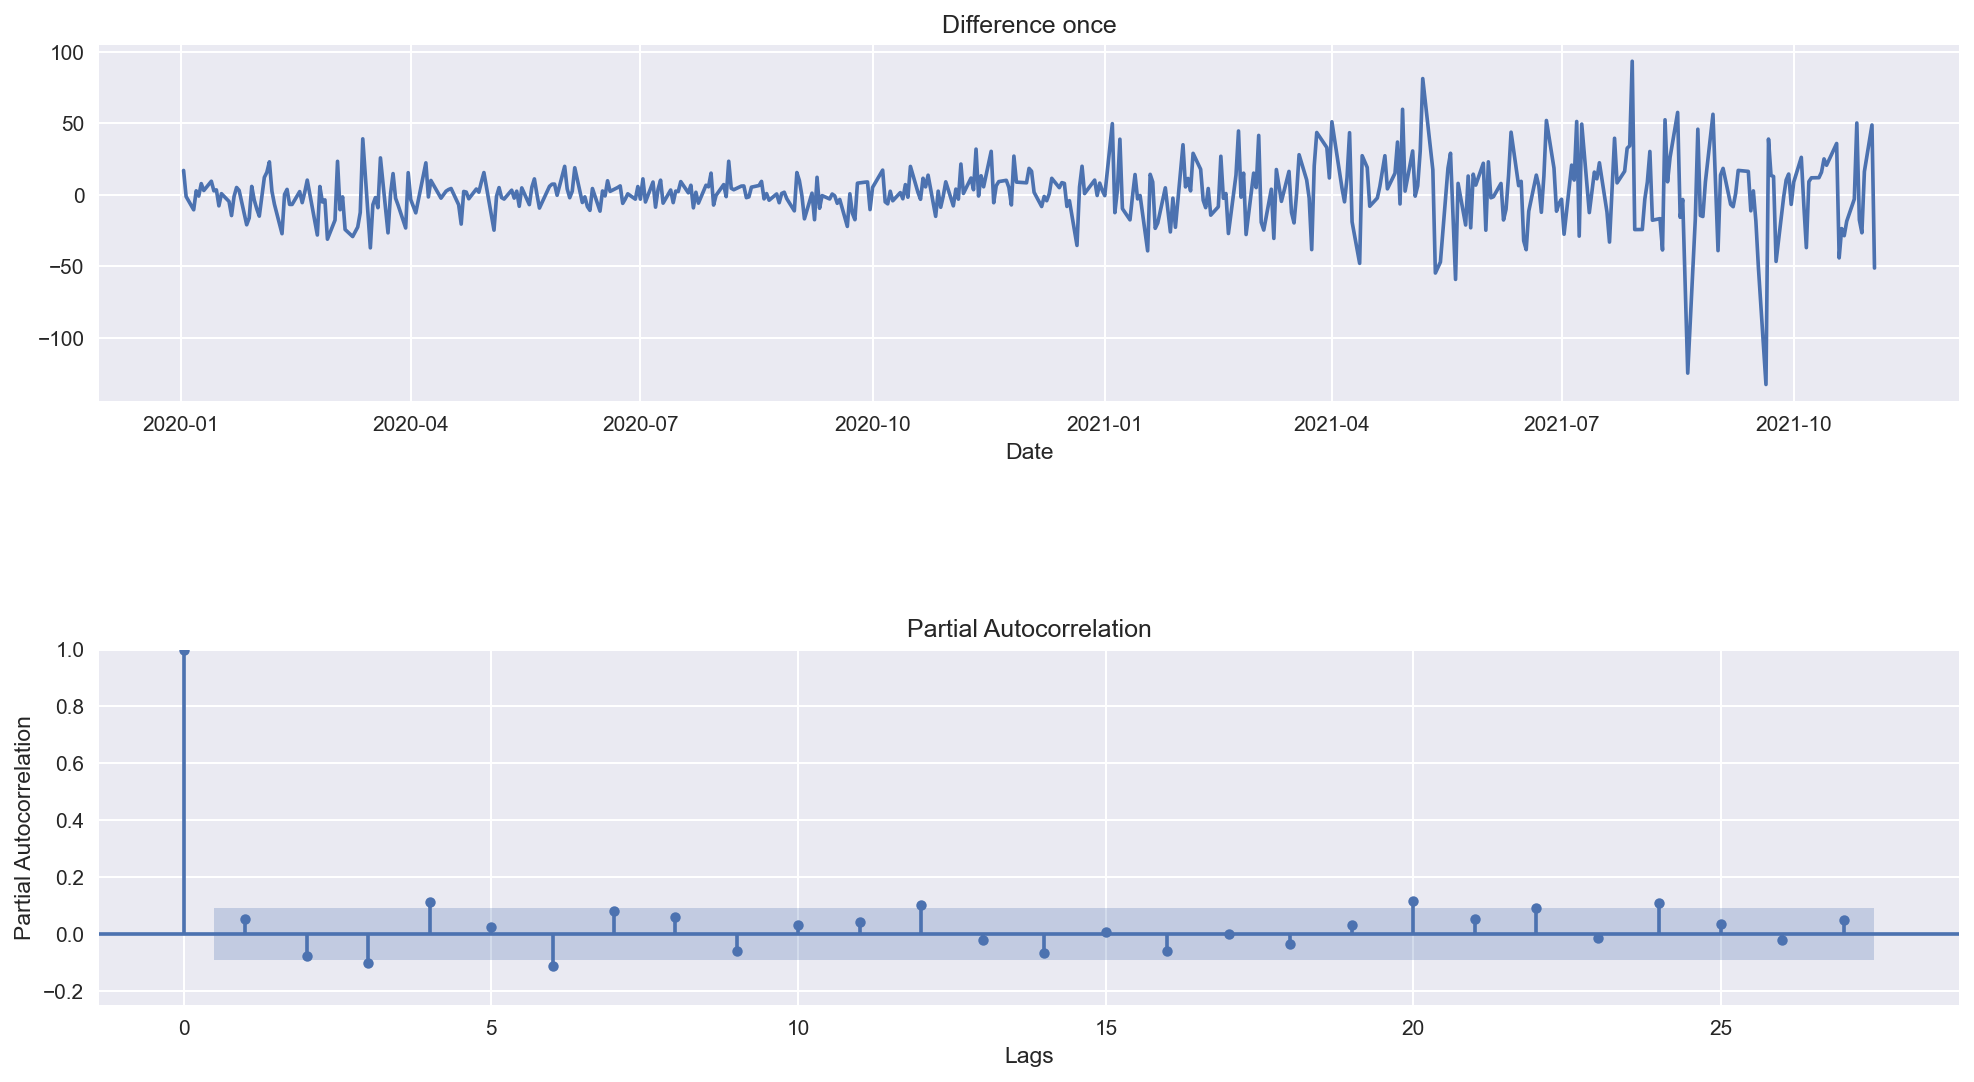

In [40]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(2, figsize=(16,8),dpi=150)

ax1.plot(diff)
ax1.set_title(("Difference once"))
ax2.set_ylim(-0.25,1)

plot_pacf(diff,ax=ax2)
plt.xlabel("Lags")
plt.ylabel("Partial Autocorrelation")

ax1.set_xlabel('Date')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=.7);

###  Take p as2

#### find Q

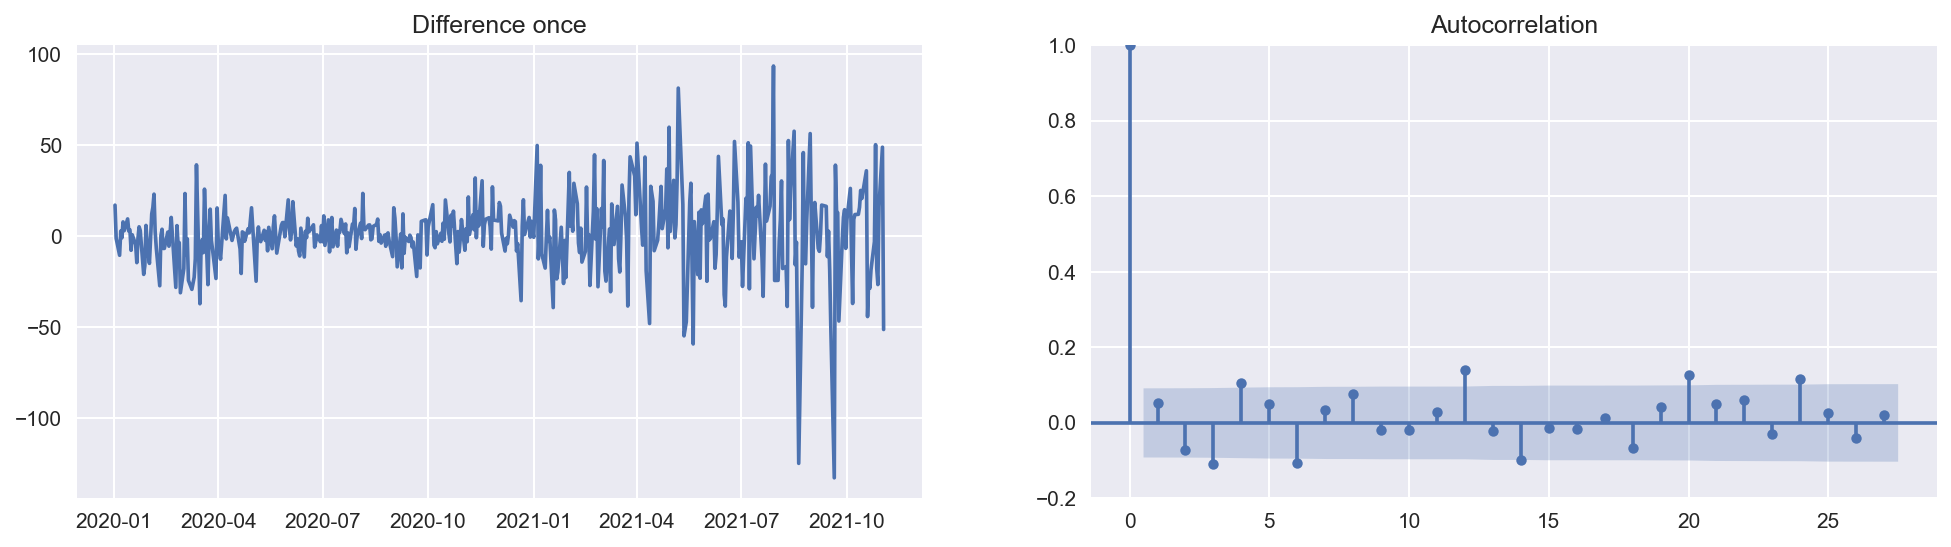

In [41]:
diff=df.diff().dropna()
fig, (ax1,ax2)= plt.subplots(1,2, figsize=(16,4),dpi=150)

ax1.plot(diff)
ax1.set_title(("Difference once"))
ax2.set_ylim(-0.2,1)


plot_acf(diff,ax=ax2);

###  Fitting the arima model

In [42]:
from statsmodels.tsa.arima_model import ARIMA

####  ARIMA (1,1,1)

In [43]:
model=ARIMA(df,order=(1,1,1))
result=model.fit(disp=0 )
import warnings
warnings.filterwarnings('ignore')

C:\Users\omami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\omami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [44]:
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2048.063
Method:                       css-mle   S.D. of innovations             21.175
Date:                Tue, 04 Jul 2023   AIC                           4104.125
Time:                        07:57:00   BIC                           4120.633
Sample:                             1   HQIC                          4110.627
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8414      1.042      1.768      0.077      -0.200       3.883
ar.L1.D.close    -0.1668      0.310     -0.538      0.590      -0.774       0.440
ma.L1.D.close     0.2285      0.303     

In [45]:
model=ARIMA(df,order=(1,1,2))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2046.816
Method:                       css-mle   S.D. of innovations             21.117
Date:                Tue, 04 Jul 2023   AIC                           4103.632
Time:                        07:57:02   BIC                           4124.266
Sample:                             1   HQIC                          4111.759
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8429      0.928      1.986      0.047       0.024       3.661
ar.L1.D.close     0.3754      0.294      1.276      0.202      -0.201       0.952
ma.L1.D.close    -0.3272      0.290     

In [46]:
model=ARIMA(df,order=(2,1,1))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2046.308
Method:                       css-mle   S.D. of innovations             21.093
Date:                Tue, 04 Jul 2023   AIC                           4102.617
Time:                        07:57:03   BIC                           4123.251
Sample:                             1   HQIC                          4110.743
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8415      0.920      2.003      0.045       0.039       3.644
ar.L1.D.close     0.3668      0.268      1.368      0.171      -0.159       0.892
ar.L2.D.close    -0.1060      0.047     

In [47]:
model=ARIMA(df,order=(1,1,3))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -2042.395
Method:                       css-mle   S.D. of innovations             20.912
Date:                Tue, 04 Jul 2023   AIC                           4096.790
Time:                        07:57:03   BIC                           4121.552
Sample:                             1   HQIC                          4106.543
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8381      0.888      2.070      0.038       0.098       3.579
ar.L1.D.close    -0.2191      0.157     -1.393      0.164      -0.527       0.089
ma.L1.D.close     0.2906      0.151     

In [48]:
## ARIMA (1,1,2)= AIC(6020)

In [49]:
model=ARIMA(df,order=(3,1,3))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -2035.697
Method:                       css-mle   S.D. of innovations             20.604
Date:                Tue, 04 Jul 2023   AIC                           4087.394
Time:                        07:57:04   BIC                           4120.409
Sample:                             1   HQIC                          4100.397
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8251      0.944      1.934      0.053      -0.024       3.674
ar.L1.D.close    -0.6008      0.286     -2.102      0.036      -1.161      -0.041
ar.L2.D.close    -0.8032      0.151     

In [50]:
model=ARIMA(df,order=(4,1,4))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2035.563
Method:                       css-mle   S.D. of innovations             20.588
Date:                Tue, 04 Jul 2023   AIC                           4091.126
Time:                        07:57:07   BIC                           4132.395
Sample:                             1   HQIC                          4107.380
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8804      0.750      2.509      0.012       0.411       3.350
ar.L1.D.close     0.3939      0.286      1.378      0.168      -0.166       0.954
ar.L2.D.close    -0.2021      0.204     

In [51]:
## AIC(3,1,3)= AIC=6015

In [52]:
model=ARIMA(df,order=(3,1,5))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -2034.699
Method:                       css-mle   S.D. of innovations             20.557
Date:                Tue, 04 Jul 2023   AIC                           4089.397
Time:                        07:57:09   BIC                           4130.666
Sample:                             1   HQIC                          4105.651
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8289      0.920      1.988      0.047       0.025       3.632
ar.L1.D.close     0.0085      0.291      0.029      0.977      -0.562       0.579
ar.L2.D.close    -0.8893      0.091     

In [53]:
model=ARIMA(df,order=(2,1,3))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2036.149
Method:                       css-mle   S.D. of innovations             20.625
Date:                Tue, 04 Jul 2023   AIC                           4086.298
Time:                        07:57:10   BIC                           4115.186
Sample:                             1   HQIC                          4097.676
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8251      0.925      1.972      0.049       0.011       3.639
ar.L1.D.close    -0.2969      0.144     -2.059      0.039      -0.579      -0.014
ar.L2.D.close    -0.6675      0.111     

In [54]:
model=ARIMA(df,order=(5,1,5))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -2031.718
Method:                       css-mle   S.D. of innovations             20.409
Date:                Tue, 04 Jul 2023   AIC                           4087.436
Time:                        07:57:15   BIC                           4136.959
Sample:                             1   HQIC                          4106.941
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8869      0.755      2.498      0.012       0.406       3.367
ar.L1.D.close    -0.7090      0.123     -5.784      0.000      -0.949      -0.469
ar.L2.D.close    -0.2404      0.094     

In [55]:
model=ARIMA(df,order=(14,1,14))
result=model.fit(disp=0)
print(result.summary())

KeyboardInterrupt: 

####  We will select ARIMA(4,1,4) with lowest AIC =6012

In [56]:
model=ARIMA(df,order=(2,1,3))
result=model.fit(disp=0)
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  458
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2036.149
Method:                       css-mle   S.D. of innovations             20.625
Date:                Tue, 04 Jul 2023   AIC                           4086.298
Time:                        07:59:42   BIC                           4115.186
Sample:                             1   HQIC                          4097.676
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.8251      0.925      1.972      0.049       0.011       3.639
ar.L1.D.close    -0.2969      0.144     -2.059      0.039      -0.579      -0.014
ar.L2.D.close    -0.6675      0.111     

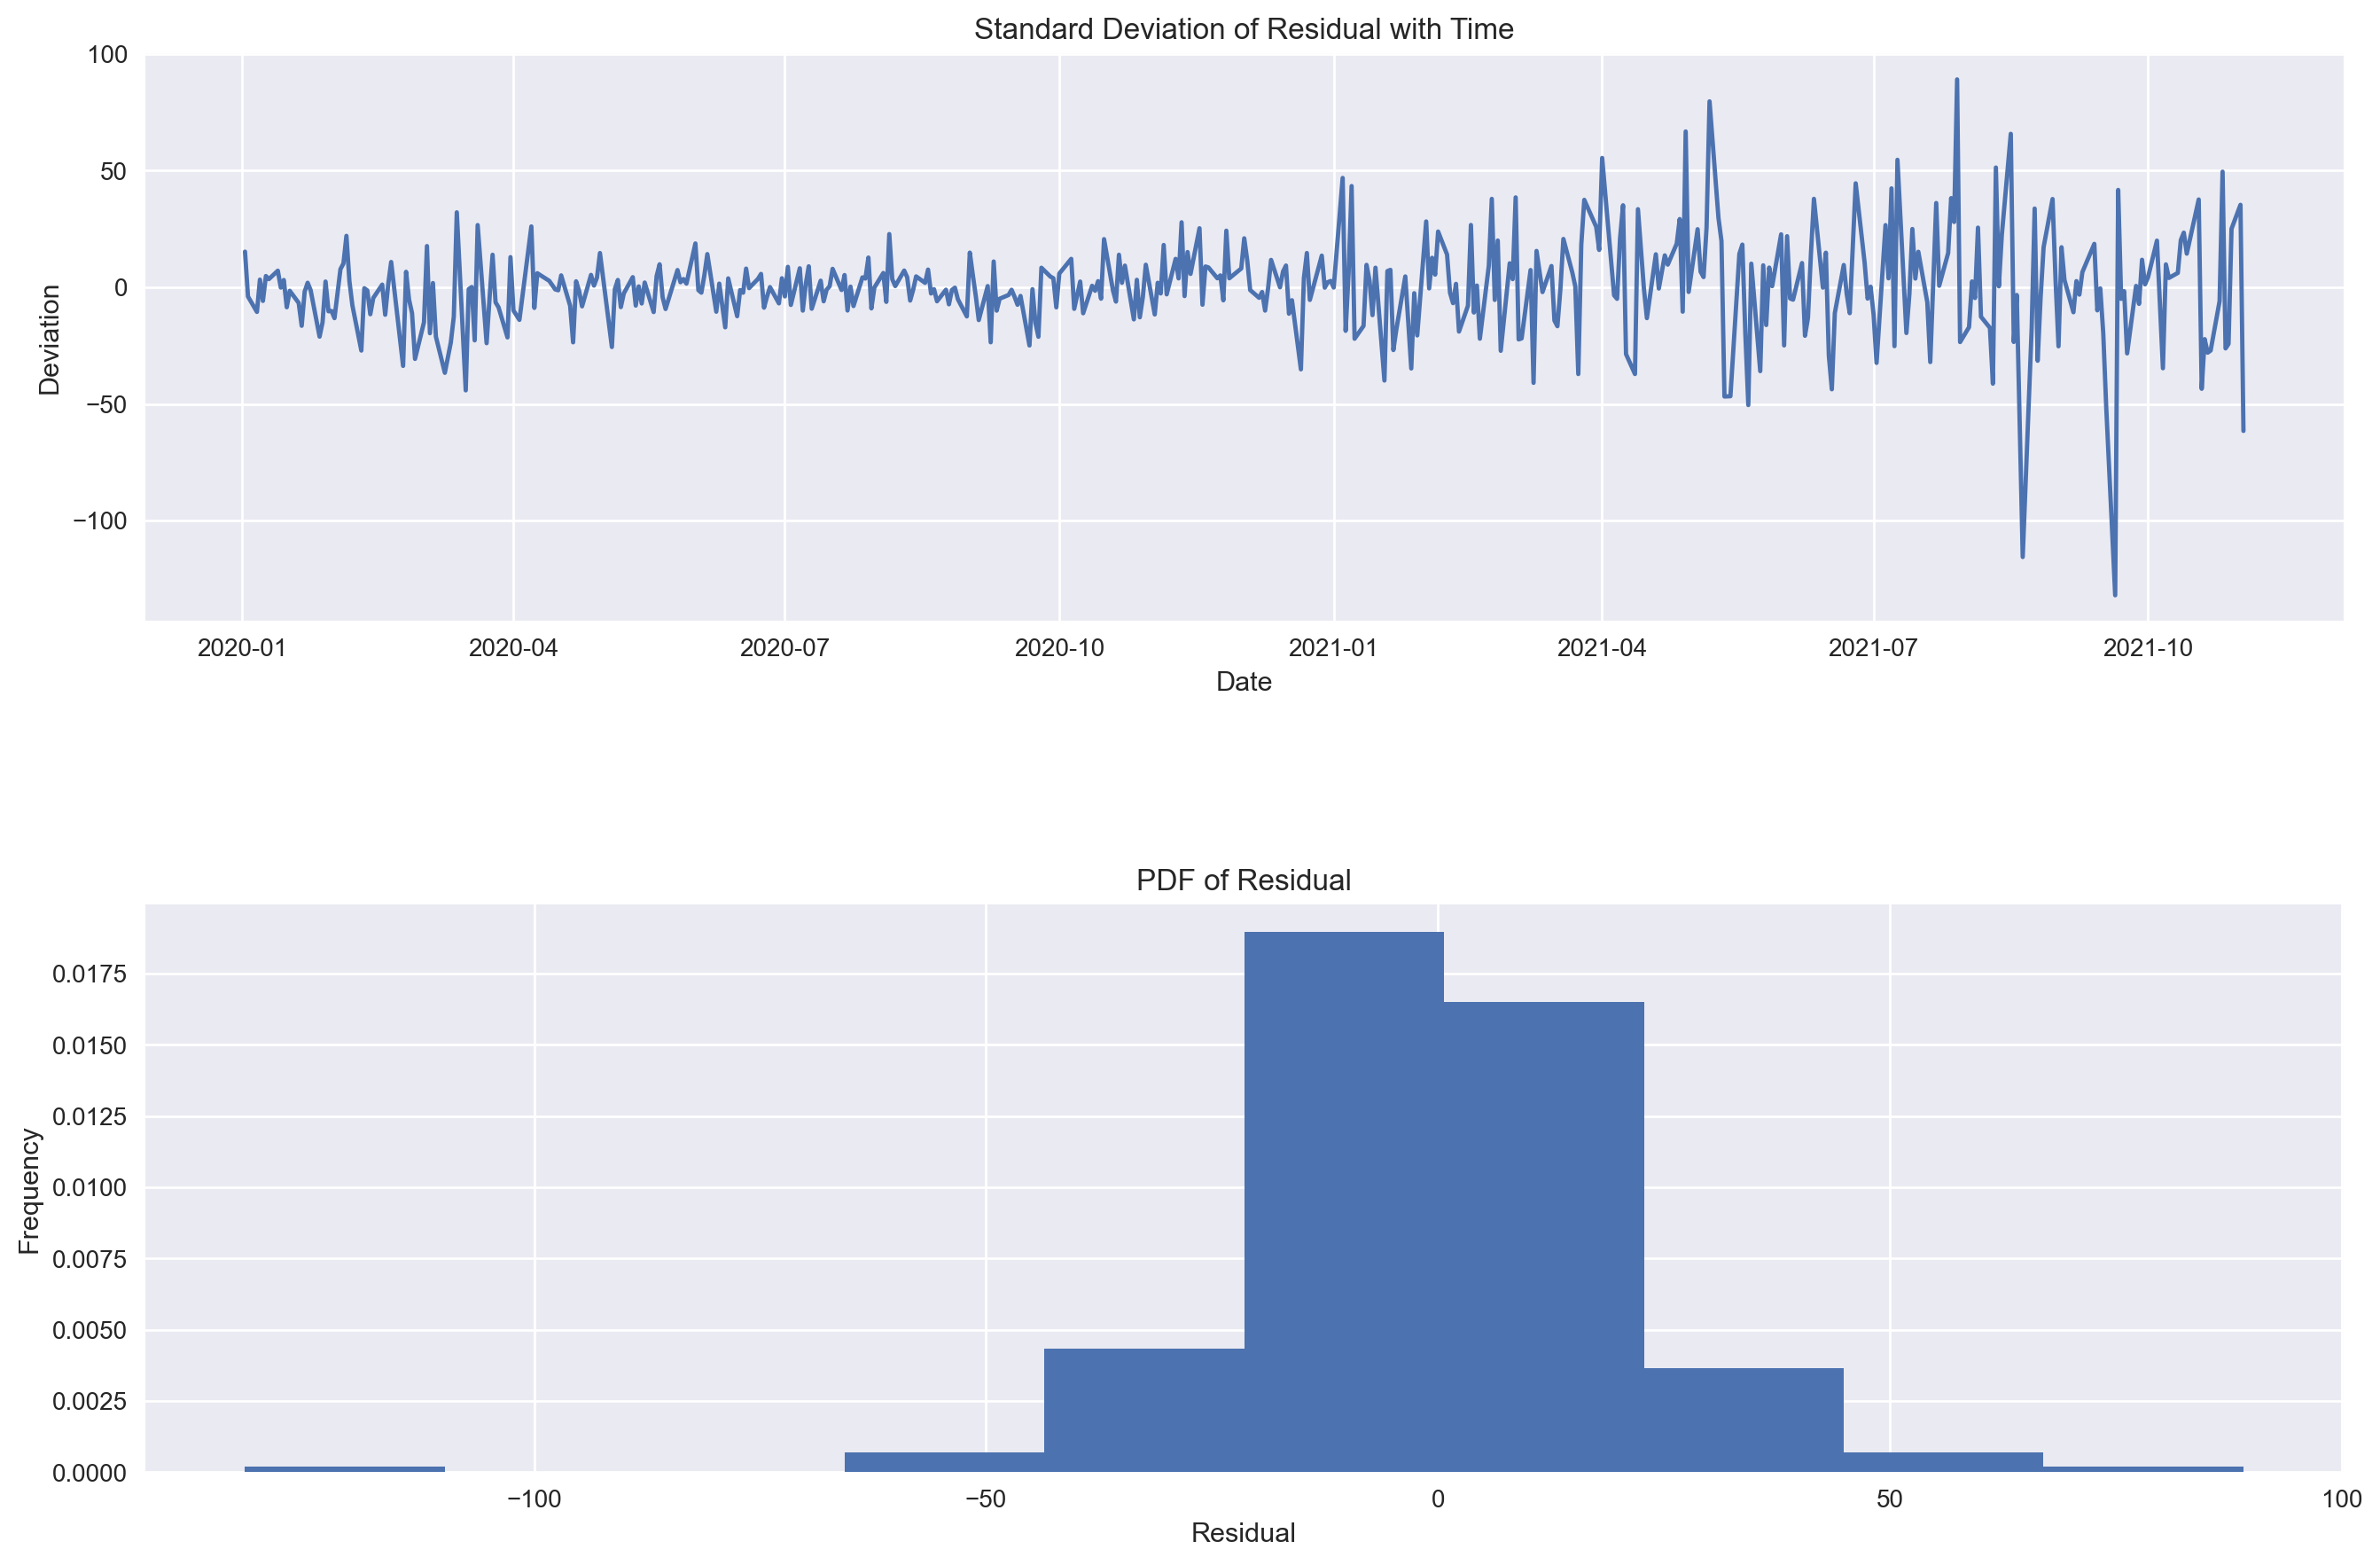

In [57]:
#plot residual
residuals=pd.DataFrame(result.resid)
fig, (ax1,ax2)=plt.subplots(2,figsize=(16,10),dpi=200)
ax1.plot(residuals)
ax2.hist(residuals,density=True)
ax2.set_title("PDF of Residual")
ax1.set_title("Standard Deviation of Residual with Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Deviation")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=.5);

In [59]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,2.583156,0.989608


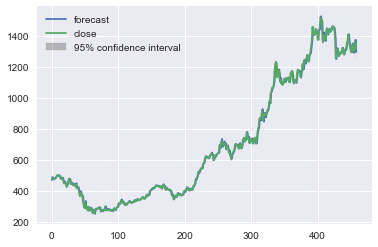

In [60]:

l_train=(len(df))
step=(len(test))
result.plot_predict(
    start=1,
    end=l_train,
    dynamic=False
    
);

In [61]:
l_train=(len(df))
step=(len(test))

In [62]:
#actual vs fitted
y_hat=result.predict(
    start=1,
    end=l_train,
    dynamic=False
);

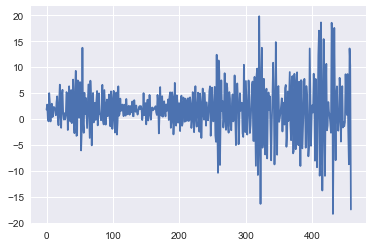

In [63]:
plt.plot(y_hat)

In [64]:
fc,se,conf=result.forecast(step)

In [65]:
fc=pd.Series(fc,index=test[:step].index)
lower=pd.Series(conf[:,0],index=test[:].index)
upper=pd.Series(conf[:,1],index=test[:].index)

In [66]:
fc

Date
2021-11-03    1296.227269
2021-11-04    1295.625451
2021-11-08    1318.659476
2021-11-09    1315.808588
2021-11-10    1304.863999
                 ...     
2022-02-22    1444.128176
2022-02-23    1445.953266
2022-02-24    1447.778352
2022-02-25    1449.603432
2022-02-28    1451.428518
Length: 81, dtype: float64

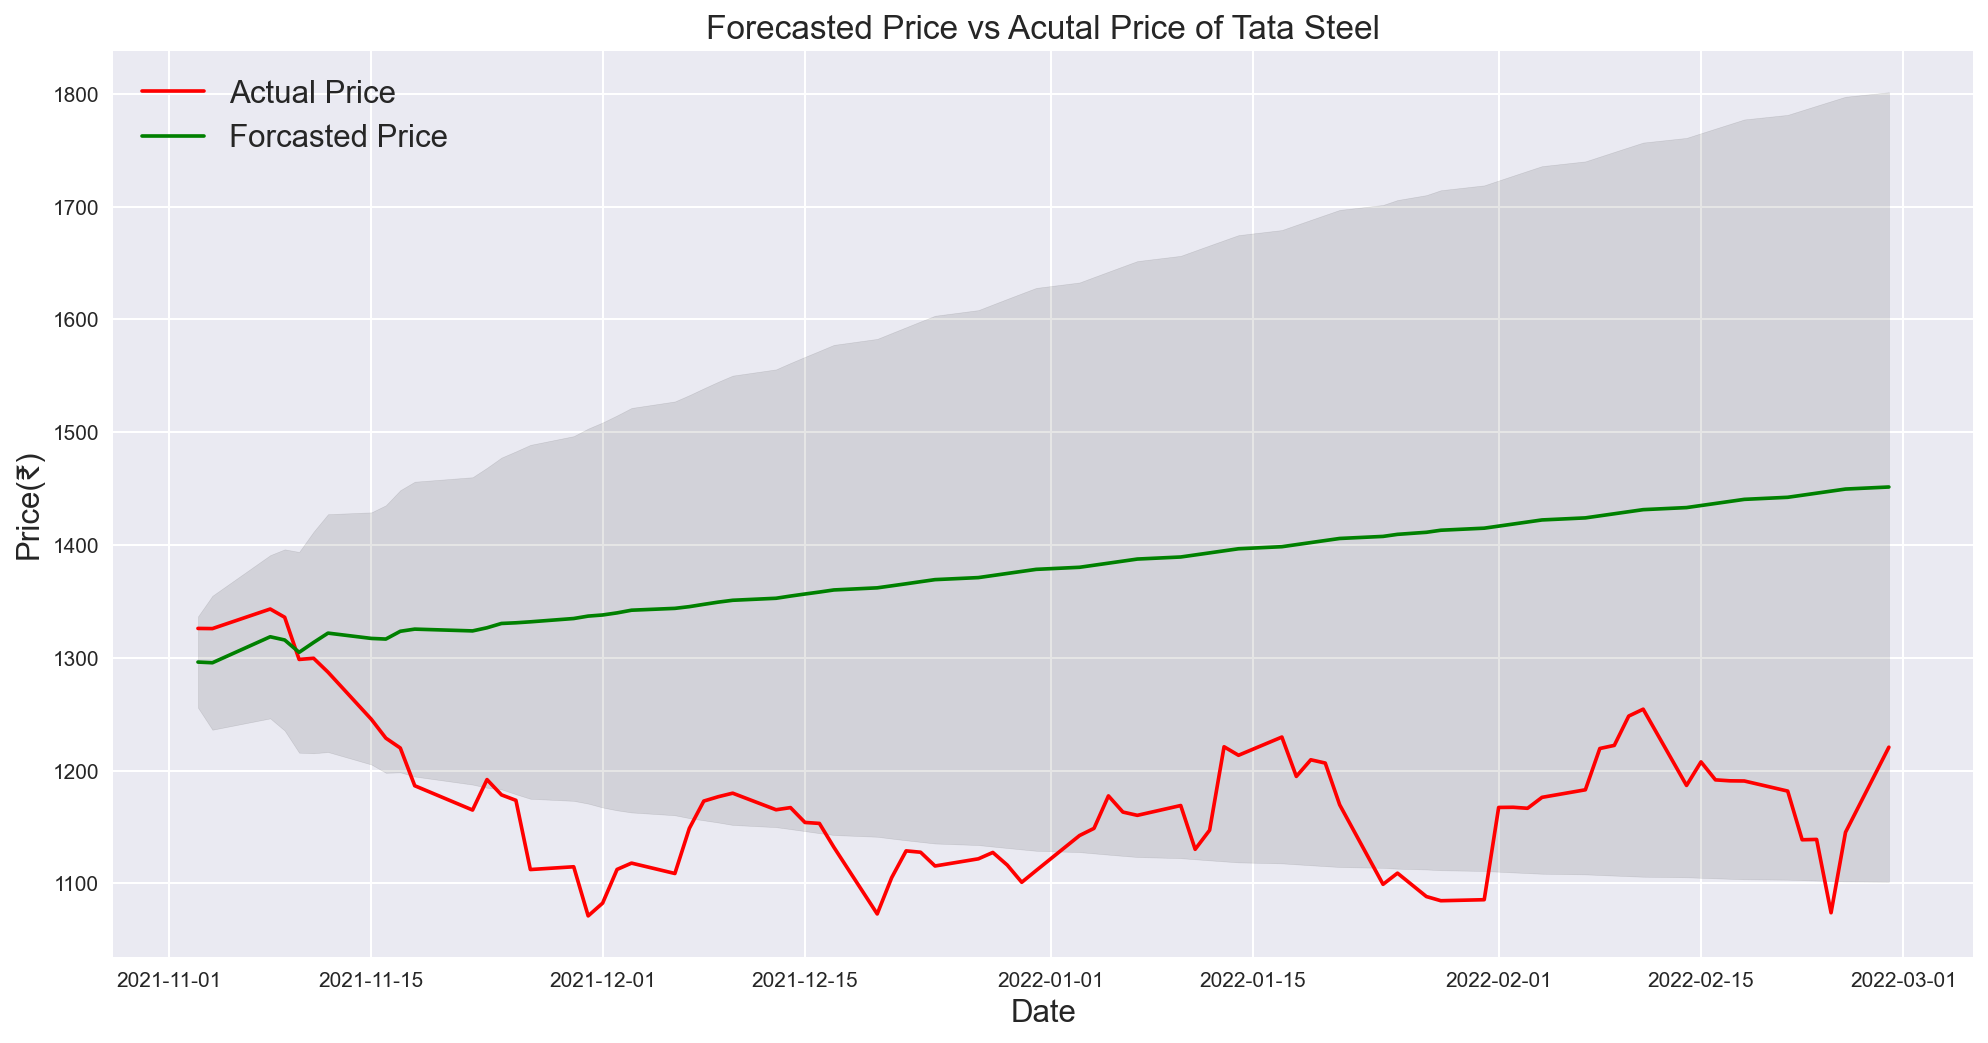

In [67]:
plt.figure(figsize=(16,8),dpi=150)

plt.plot(test[:step],label="Actual Price",color="red")
plt.plot(fc,label="Forcasted Price",color="green")
plt.fill_between(lower.index,lower,upper,color="k",alpha=0.1)
plt.title("Forecasted Price vs Acutal Price of Tata Steel",fontsize=16)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price(₹)",fontsize=15)
plt.legend(loc="upper left", fontsize=15)
plt.show()

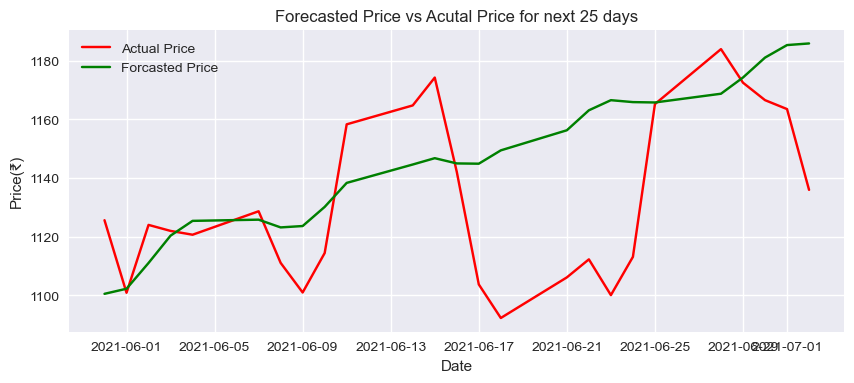

In [93]:
plt.figure(figsize=(10,4),dpi=100)
plt.plot(test[:25],label="Actual Price",color="red")
plt.plot(fc[:25],label="Forcasted Price",color="green")
plt.xlabel("Date")
plt.ylabel("Price(₹)")
plt.legend(loc="upper left", fontsize=10)
plt.title("Forecasted Price vs Acutal Price for next 25 days")
plt.show()



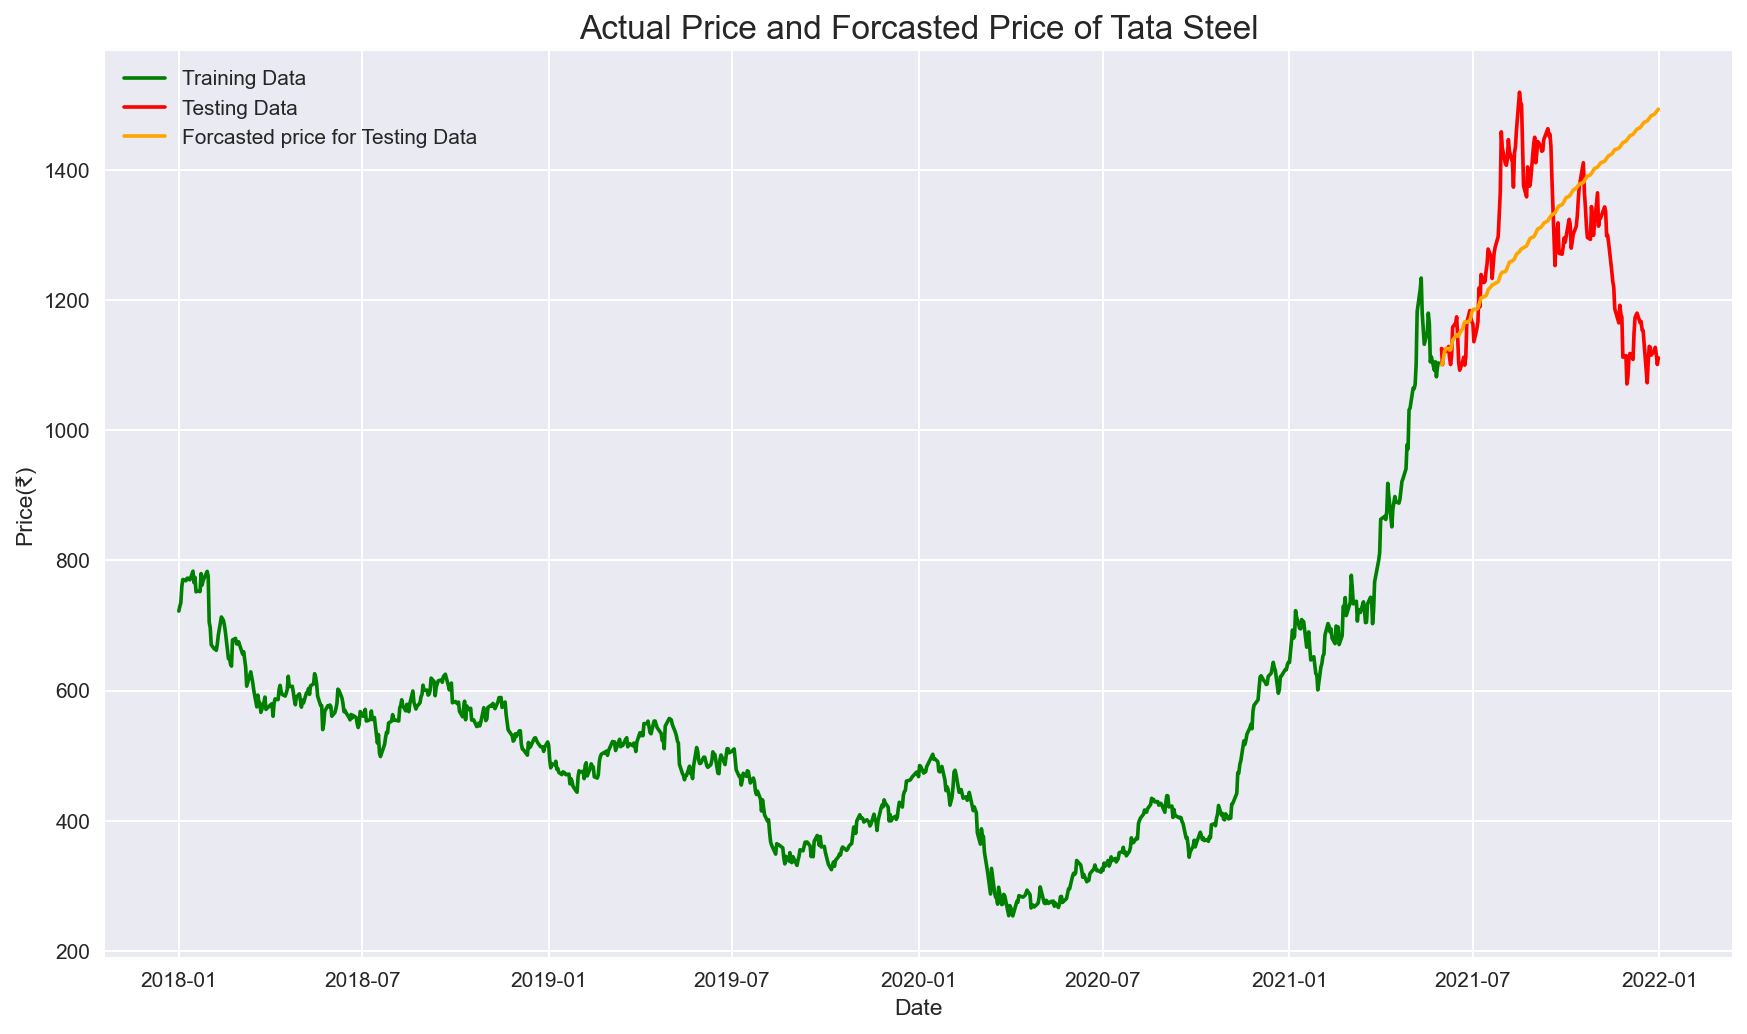

In [99]:
plt.figure(figsize=(14,8),dpi=150)
plt.plot(df,color="green",label="Training Data")
plt.plot(test,color="red",label="Testing Data")
plt.plot(fc,color="orange",label="Forcasted price for Testing Data")
plt.xlabel("Date")
plt.ylabel("Price(₹)")
plt.title("Actual Price and Forcasted Price of Tata Steel",fontsize=16)
plt.legend(loc="upper left", fontsize=10)
;
plt.show()

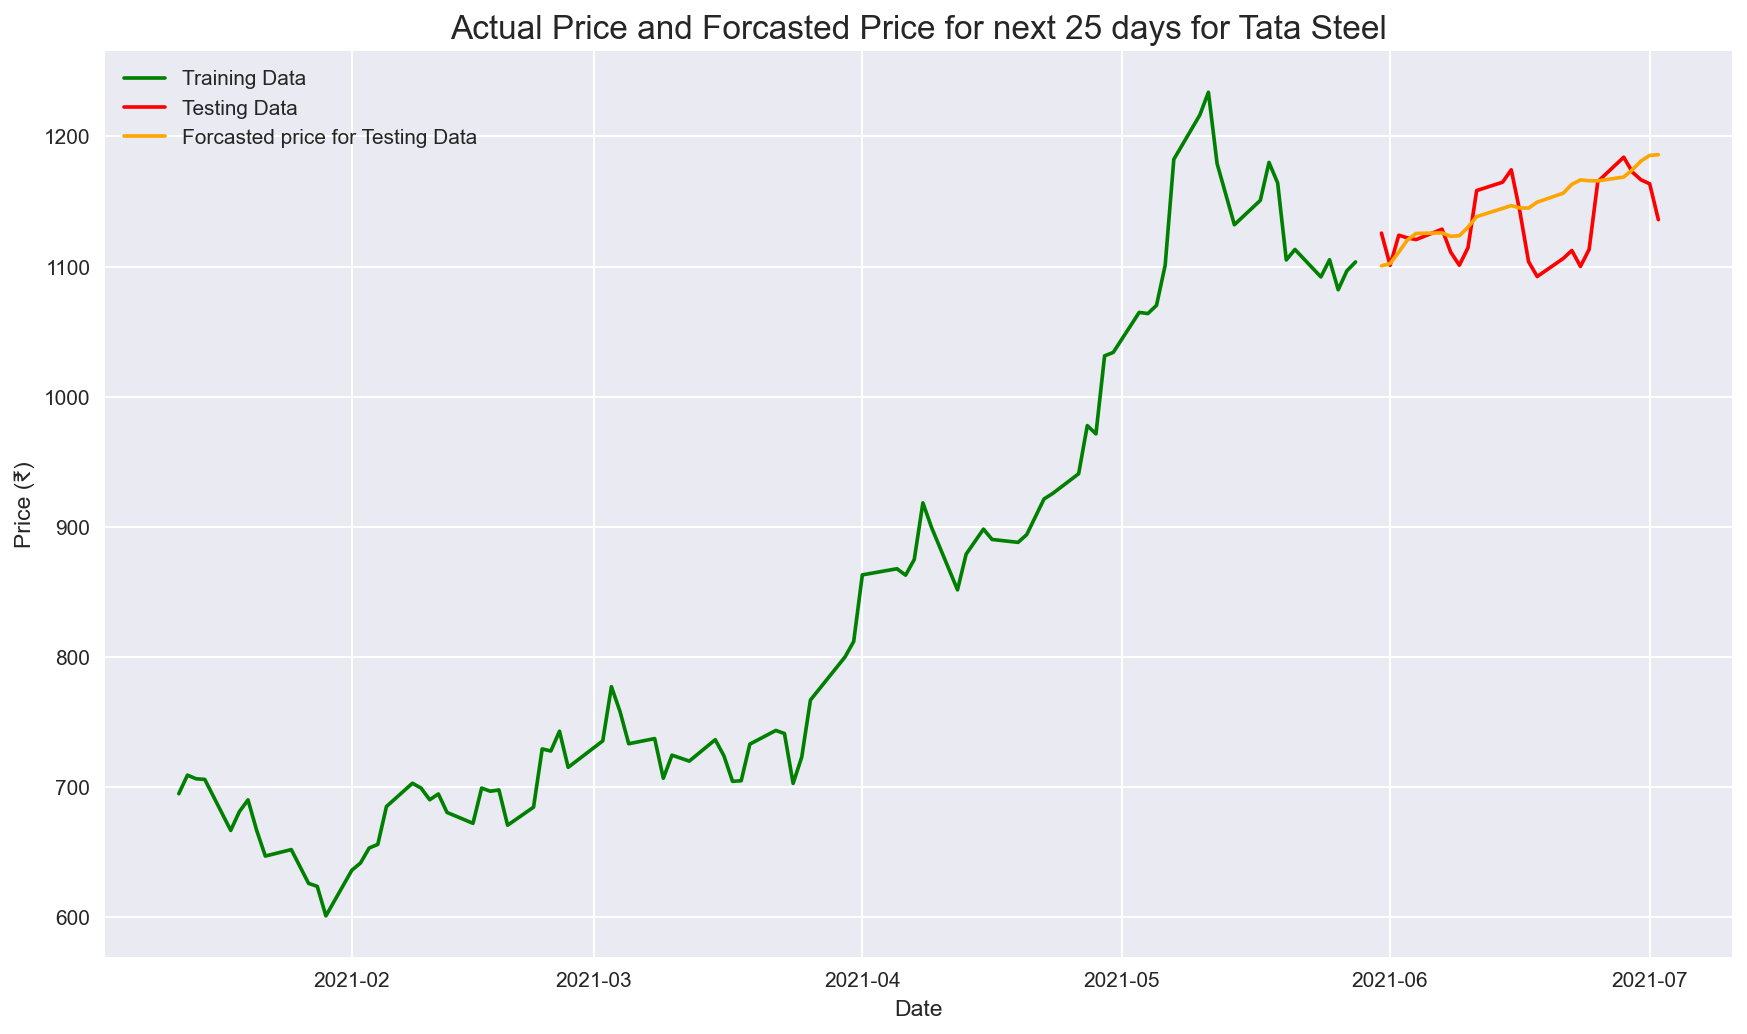

In [103]:
plt.figure(figsize=(14,8),dpi=150)
plt.plot(df[750:],color="green",label="Training Data")
plt.plot(test[:25],color="red",label="Testing Data")
plt.plot(fc[:25],color="orange",label="Forcasted price for Testing Data")
plt.xlabel("Date")
plt.ylabel("Price (₹)")
plt.title("Actual Price and Forcasted Price for next 25 days for Tata Steel",fontsize=16)
plt.legend(loc="upper left", fontsize=10)
;
plt.show()

In [203]:
start=1
end=len(df)
pred=result.predict(start=start,end=end,typ="levels")
print(pred)

0      257.727382
1      257.239469
2      274.413060
3      268.126209
4      250.994148
          ...    
798    514.104834
799    517.700453
800    514.779212
801    507.136394
802    521.802933
Length: 803, dtype: float64


In [204]:
#### Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
rmse_train=math.sqrt(mean_squared_error(df,pred))
rmse1=math.sqrt(mean_squared_error(test,fc))

In [205]:
rmse_train

1.7536037666787996

In [206]:
rmse1

138.8874330521025

In [556]:
from sklearn.metrics import mean_absolute_error
MAPE_training= mean_absolute_error(df,pred)
MAPE_test=mean_absolute_error(test,fc)

In [557]:
print(MAPE_training)
print(MAPE_test)

1.3756251464503522
112.58433439795132


#### LSTM

In [88]:
df=data_tata_steel["close"]


In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [92]:
np.std(df1)

0.2450184805992504

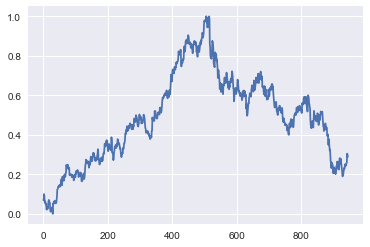

In [245]:
plt.plot(df1)

In [246]:
# n=int(len(df1)*0.85)
# df=df1[:n]
# test=df1[n:]

In [247]:
df1

array([[0.0704947 ],
       [0.06961131],
       [0.10035336],
       [0.0905477 ],
       [0.05724382],
       [0.06378092],
       [0.06033569],
       [0.04991166],
       [0.05141343],
       [0.03754417],
       [0.02155477],
       [0.03250883],
       [0.03621908],
       [0.02561837],
       [0.0319788 ],
       [0.05353357],
       [0.06607774],
       [0.07084806],
       [0.06484099],
       [0.05689046],
       [0.05618375],
       [0.02464664],
       [0.0114841 ],
       [0.01492933],
       [0.02888693],
       [0.02932862],
       [0.03180212],
       [0.03215548],
       [0.01236749],
       [0.        ],
       [0.05159011],
       [0.04832155],
       [0.05962898],
       [0.05892226],
       [0.06316254],
       [0.06669611],
       [0.06369258],
       [0.05371025],
       [0.05415194],
       [0.05468198],
       [0.05583039],
       [0.06987633],
       [0.08842756],
       [0.12287986],
       [0.12553004],
       [0.13127208],
       [0.13763251],
       [0.139

In [248]:
df1.shape

(945, 1)

In [249]:
## spliting dataset into rain and test split converting to array of training and testing data
training_size=int(len(df1)*.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [250]:
training_size,test_size

(803, 142)

In [251]:
## convert an array of values into a data matrix
def create_dataset(dataset,time_step):
    dataX,dataY=[],[]
    for i in range (len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [252]:
## reshape into X=t,t+1,t+3 and Y=t+4
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [253]:
print(X_train.shape)

(702, 100)


In [254]:
## reshape LSTM in 3 dimention
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [255]:
print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)


(41, 100, 1)
(702, 100, 1)
(702,)
(41,)


In [256]:
### creating LSTM model

In [257]:
#pip install tensorflow

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [259]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [262]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [261]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
11/11 [==============================] - 5s 176ms/step - loss: 0.0870 - val_loss: 0.0106
Epoch 2/10
11/11 [==============================] - 1s 103ms/step - loss: 0.0132 - val_loss: 0.0153
Epoch 3/10
11/11 [==============================] - 1s 102ms/step - loss: 0.0069 - val_loss: 0.0055
Epoch 4/10
11/11 [==============================] - 1s 103ms/step - loss: 0.0053 - val_loss: 0.0082
Epoch 5/10
11/11 [==============================] - 1s 101ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 6/10
11/11 [==============================] - 1s 103ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 7/10
11/11 [==============================] - 1s 108ms/step - loss: 0.0022 - val_loss: 0.0015
Epoch 8/10
11/11 [==============================] - 1s 108ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 9/10
11/11 [==============================] - 1s 110ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 10/10
11/11 [==============================] - 1s 114ms/step - loss: 0.0021 - val_loss: 0.0014

In [263]:
import tensorflow as tf

In [264]:
tf.__version__

'2.9.1'

In [265]:
X_train.shape

(702, 100, 1)

In [266]:
## Prediction of matrix
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2/2 [==============================] - 0s 14ms/step


In [267]:
train_predict.shape

(702, 1)

In [268]:
## transformation to original 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [269]:
#### Calculate RMSE performance matrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

539.9761359251488

In [270]:
y_train.shape

(702,)

In [271]:
## test dataRMSE
math.sqrt(mean_squared_error(y_test,test_predict))

361.6979025855248

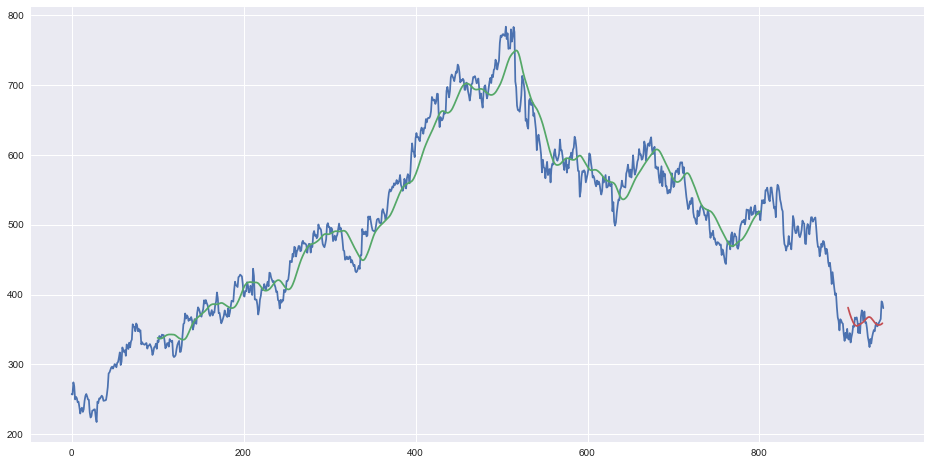

In [280]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [888]:
x=len(test_data)-100

In [787]:
x_input=test_data[x:].reshape(1,-1)
x_input.shape

(1, 100)

In [788]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [789]:
temp_input

[0.49496466431095404,
 0.4719081272084806,
 0.4674911660777385,
 0.47446996466431096,
 0.4858657243816254,
 0.5094522968197881,
 0.5036219081272084,
 0.5022968197879858,
 0.4515901060070671,
 0.4501766784452296,
 0.4886925795053004,
 0.5008833922261484,
 0.49496466431095404,
 0.4748233215547703,
 0.495583038869258,
 0.5178445229681978,
 0.5180212014134276,
 0.5068904593639576,
 0.5113957597173144,
 0.5146643109540636,
 0.5173144876325089,
 0.49081272084805655,
 0.4608657243816255,
 0.4426678445229682,
 0.4433745583038869,
 0.4192579505300353,
 0.43197879858657245,
 0.45123674911660766,
 0.4431095406360424,
 0.45795053003533565,
 0.4561837455830388,
 0.4401060070671378,
 0.425,
 0.4382508833922261,
 0.4281802120141343,
 0.40371024734982325,
 0.3937279151943463,
 0.40282685512367494,
 0.3815371024734982,
 0.34902826855123675,
 0.3790636042402827,
 0.35777385159010594,
 0.33851590106007073,
 0.321113074204947,
 0.3252650176678445,
 0.29045936395759714,
 0.2648409893992932,
 0.255918727915

In [790]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.28193524]
101
1 day input [0.47190813 0.46749117 0.47446996 0.48586572 0.5094523  0.50362191
 0.50229682 0.45159011 0.45017668 0.48869258 0.50088339 0.49496466
 0.47482332 0.49558304 0.51784452 0.5180212  0.50689046 0.51139576
 0.51466431 0.51731449 0.49081272 0.46086572 0.44266784 0.44337456
 0.41925795 0.4319788  0.45123675 0.44310954 0.45795053 0.45618375
 0.44010601 0.425      0.43825088 0.42818021 0.40371025 0.39372792
 0.40282686 0.3815371  0.34902827 0.3790636  0.35777385 0.3385159
 0.32111307 0.32526502 0.29045936 0.26484099 0.25591873 0.23180212
 0.25998233 0.25715548 0.25097173 0.24867491 0.22173145 0.20530035
 0.22570671 0.21298587 0.23568905 0.2110424  0.2085689  0.22508834
 0.20123675 0.21510601 0.22553004 0.24363958 0.24081272 0.26422261
 0.26068905 0.26475265 0.25371025 0.22517668 0.24867491 0.22464664
 0.26687279 0.28242049 0.27084806 0.25538869 0.27959364 0.25114841
 0.25265018 0.23683746 0.21572438 0.20424028 0.18957597 0.21015901
 0.19867491 0.21466431 0.225      

8 day output [[0.30464056]]
9 day input [0.45017668 0.48869258 0.50088339 0.49496466 0.47482332 0.49558304
 0.51784452 0.5180212  0.50689046 0.51139576 0.51466431 0.51731449
 0.49081272 0.46086572 0.44266784 0.44337456 0.41925795 0.4319788
 0.45123675 0.44310954 0.45795053 0.45618375 0.44010601 0.425
 0.43825088 0.42818021 0.40371025 0.39372792 0.40282686 0.3815371
 0.34902827 0.3790636  0.35777385 0.3385159  0.32111307 0.32526502
 0.29045936 0.26484099 0.25591873 0.23180212 0.25998233 0.25715548
 0.25097173 0.24867491 0.22173145 0.20530035 0.22570671 0.21298587
 0.23568905 0.2110424  0.2085689  0.22508834 0.20123675 0.21510601
 0.22553004 0.24363958 0.24081272 0.26422261 0.26068905 0.26475265
 0.25371025 0.22517668 0.24867491 0.22464664 0.26687279 0.28242049
 0.27084806 0.25538869 0.27959364 0.25114841 0.25265018 0.23683746
 0.21572438 0.20424028 0.18957597 0.21015901 0.19867491 0.21466431
 0.225      0.23268551 0.2295053  0.24487633 0.25106007 0.24204947
 0.245053   0.25159011 0.2557

17 day output [[0.32573244]]
18 day input [0.51139576 0.51466431 0.51731449 0.49081272 0.46086572 0.44266784
 0.44337456 0.41925795 0.4319788  0.45123675 0.44310954 0.45795053
 0.45618375 0.44010601 0.425      0.43825088 0.42818021 0.40371025
 0.39372792 0.40282686 0.3815371  0.34902827 0.3790636  0.35777385
 0.3385159  0.32111307 0.32526502 0.29045936 0.26484099 0.25591873
 0.23180212 0.25998233 0.25715548 0.25097173 0.24867491 0.22173145
 0.20530035 0.22570671 0.21298587 0.23568905 0.2110424  0.2085689
 0.22508834 0.20123675 0.21510601 0.22553004 0.24363958 0.24081272
 0.26422261 0.26068905 0.26475265 0.25371025 0.22517668 0.24867491
 0.22464664 0.26687279 0.28242049 0.27084806 0.25538869 0.27959364
 0.25114841 0.25265018 0.23683746 0.21572438 0.20424028 0.18957597
 0.21015901 0.19867491 0.21466431 0.225      0.23268551 0.2295053
 0.24487633 0.25106007 0.24204947 0.245053   0.25159011 0.25574205
 0.26060071 0.30512367 0.30123675 0.2880742  0.28193524 0.28781846
 0.29194203 0.29485682

25 day output [[0.34674105]]
26 day input [0.4319788  0.45123675 0.44310954 0.45795053 0.45618375 0.44010601
 0.425      0.43825088 0.42818021 0.40371025 0.39372792 0.40282686
 0.3815371  0.34902827 0.3790636  0.35777385 0.3385159  0.32111307
 0.32526502 0.29045936 0.26484099 0.25591873 0.23180212 0.25998233
 0.25715548 0.25097173 0.24867491 0.22173145 0.20530035 0.22570671
 0.21298587 0.23568905 0.2110424  0.2085689  0.22508834 0.20123675
 0.21510601 0.22553004 0.24363958 0.24081272 0.26422261 0.26068905
 0.26475265 0.25371025 0.22517668 0.24867491 0.22464664 0.26687279
 0.28242049 0.27084806 0.25538869 0.27959364 0.25114841 0.25265018
 0.23683746 0.21572438 0.20424028 0.18957597 0.21015901 0.19867491
 0.21466431 0.225      0.23268551 0.2295053  0.24487633 0.25106007
 0.24204947 0.245053   0.25159011 0.25574205 0.26060071 0.30512367
 0.30123675 0.2880742  0.28193524 0.28781846 0.29194203 0.29485682
 0.29708904 0.29901081 0.30084392 0.30270344 0.30464056 0.30667308
 0.30880246 0.311023

In [945]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [946]:
print(day_new.shape)
print(day_pred.shape)

(100,)
(30,)


ValueError: x and y must have same first dimension, but have shapes (100,) and (945, 1)

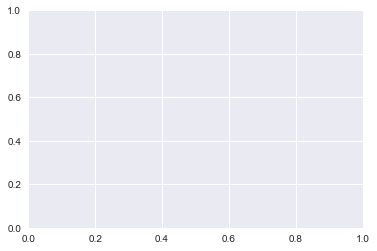

In [947]:
plt.plot(day_new,scaler.inverse_transform(df1[:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

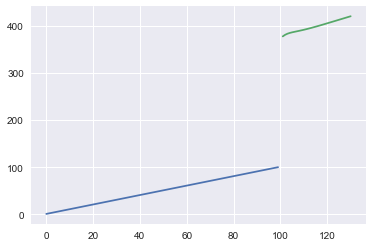

In [948]:
plt.plot(day_new)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

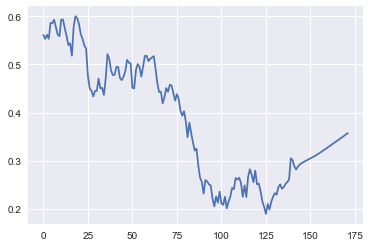

In [949]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[training_size:])


In [950]:
df3=scaler.inverse_transform(df3).tolist()

In [951]:
Y_lstm=(df3[800:943])

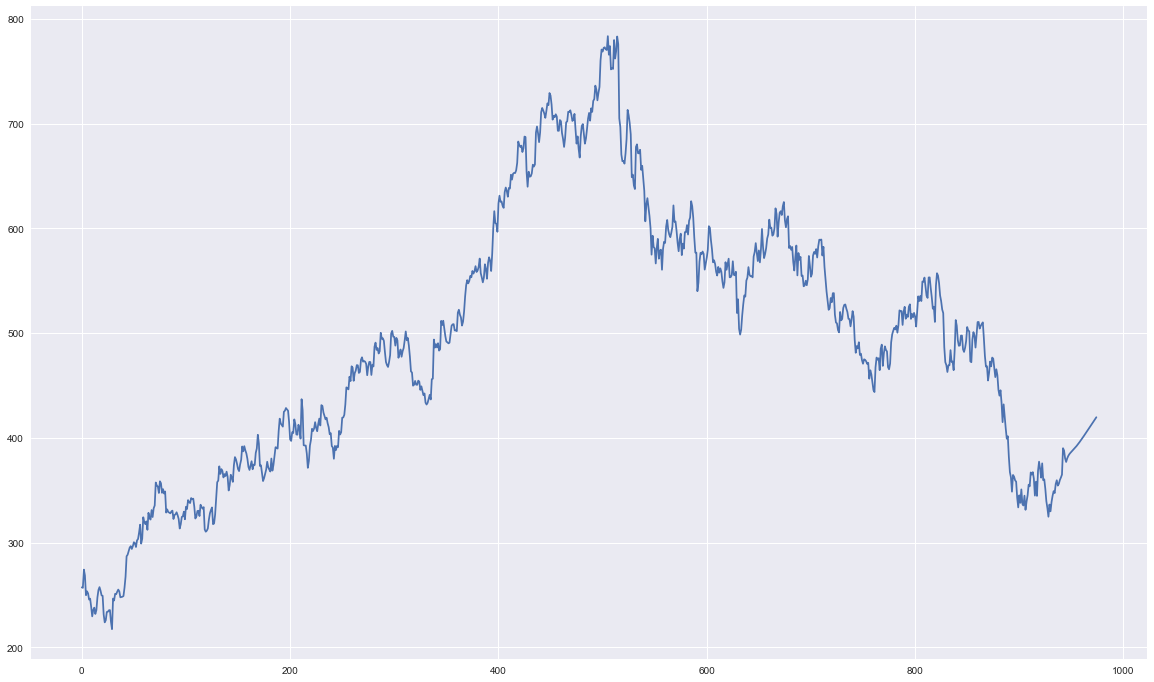

In [960]:
plt.figure(figsize=(20,12))
plt.plot(df3)


In [812]:
xPred=fc

In [892]:
data_tata_steel.head()

,close
Date,
2016-01-01,257.40
2016-01-04,256.90
2016-01-05,274.30
2016-01-06,268.75
2016-01-07,249.90


In [939]:
fc_s = fc_arima[0].values

In [920]:
index=(range(800,942))

In [934]:
fc_a=pd.DataFrame(fc_s,index=index,columns=["col"])

In [941]:
y_train.shape

(702,)